In [1]:
cd C:\Users\Daniele\Desktop\Materiale Tesi\Tesi magistrale\datasets\NLS

C:\Users\Daniele\Desktop\Materiale Tesi\Tesi magistrale\datasets\NLS


# Import

In [2]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler

# Aggiungo gli headers al CSV
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

df = pd.read_csv('KDDTrain+.csv', encoding='cp1252', names = col_names)
df_test = pd.read_csv('KDDTest+.csv', encoding='cp1252', names = col_names)

labeldf=df['label']
labeldf_test=df_test['label']

C:\Users\Daniele\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Daniele\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Daniele\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Daniele\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Functions

In [3]:
#Dataset Preparation ----------------------------------------------------------------------------------------------------------

def prepareMulticlass():
    # change the label column
    newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
    newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
    return newlabeldf, newlabeldf_test

def prepareBinary():
    # change the label column
    newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
    newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
    return newlabeldf, newlabeldf_test
  
colNames=list()
colNames_test=list()

def getFullDf():
    global colNames
    colNames=list(df)
    return df

def getFullDfTest():
    global colNames_test
    colNames_test=list(df_test)
    return df_test

def getReducedDf():
    global colNames
    df_reduced=df.drop('protocol_type', axis=1, inplace=False)
    df_reduced=df_reduced.drop('service', axis=1, inplace=False)
    df_reduced=df_reduced.drop('flag', axis=1, inplace=False)
    colNames=list(df_reduced)
    return df_reduced

def getReducedDfTest():
    global colNames_test
    df_reduced=df_test.drop('protocol_type', axis=1, inplace=False)
    df_reduced=df_reduced.drop('service', axis=1, inplace=False)
    df_reduced=df_reduced.drop('flag', axis=1, inplace=False)
    colNames_test=list(df_reduced)
    return df_reduced

def oneHotEcoding(df, column_name):
    df_drop = df.drop(column_name, axis=1, inplace=False)
    one_hot = pd.get_dummies(df[column_name])
    if(column_name == 'service'):
        column_list=list()
        for string in one_hot.columns.tolist():
            column_list.append(column_name+'_'+str(string))
        one_hot.columns=column_list
    df = pd.concat([df_drop, one_hot], axis=1)
    
    return df

def getXandY(df):
    X = df.drop('label',axis=1, inplace=False)
    Y = df.label
    return X, Y

def overSampledDF(X, Y): 
    sm = SMOTE(random_state=42)
    X_resampled, Y_resampled = sm.fit_resample(X, Y)
    df = pd.concat([X_resampled, Y_resampled], axis=1)
    return df

def createMulticlassDF(df):
    to_drop_DoS = [0,1]
    to_drop_Probe = [0,2]
    to_drop_R2L = [0,3]
    to_drop_U2R = [0,4]

    DoS_df=df[df['label'].isin(to_drop_DoS)];
    Probe_df=df[df['label'].isin(to_drop_Probe)];
    R2L_df=df[df['label'].isin(to_drop_R2L)];
    U2R_df=df[df['label'].isin(to_drop_U2R)];
    return DoS_df, Probe_df, R2L_df, U2R_df 

def standardScaler(df):
    scaler = preprocessing.StandardScaler().fit(df)
    return scaler.transform(df) 

def minMaxScaler(df):
    scaler = preprocessing.MinMaxScaler().fit(df)
    return scaler.transform(df)

def recursiveFeatureExtraction(model, X, Y, n):
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X, Y)
    X=rfe.transform(X)
    true=rfe.support_
    rfecolindex=[i for i, x in enumerate(true) if x]
    rfecolname=list(colNames[i] for i in rfecolindex)
    return X, rfecolindex

def adaptTestset(train, test):
    train_service_list=[]
    test_service_list = []
    
    for string in train.columns.tolist():
        if('service' in string):
            train_service_list.append(string)
    
    for string in test.columns.tolist():
        if('service' in string):
            test_service_list.append(string)

    difference=list(set(train_service_list) - set(test_service_list))

    for col in difference:
        test[col] = 0
    return test.reindex(columns=train.columns)

# Algorythms-------------------------------------------------------------------------------------------------------------------- 

def NN(X, Y, n):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=n))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[keras.metrics.Accuracy(), keras.metrics.Precision()])
    model.fit(X, Y, epochs=40, batch_size=100)
    return model

def MulticlassNN(X, Y, n):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=n))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[keras.metrics.Accuracy(), keras.metrics.Precision()])
    model.fit(X, Y, epochs=40, batch_size=100)
    return model

def modelNN(X, Y, n):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=n))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

def modelMulticlassNN(X, Y, n):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=n))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model

def stratifiedCVNN(model, X, Y, k, pos_label):
    skf = StratifiedKFold(n_splits=k)

    precision_test_sum = 0
    recall_test_sum = 0
    f1_test_sum = 0
    accuracy_test_sum = 0  
    precision_train_sum = 0
    recall_train_sum = 0
    f1_train_sum = 0
    accuracy_train_sum = 0 

    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        test_accuracy = accuracy_score(y_test, y_test_pred > 0.5)
        test_precision = precision_score(y_test, y_test_pred > 0.5, pos_label=pos_label)
        test_recall = recall_score(y_test, y_test_pred > 0.5, pos_label=pos_label)
        test_f1 = f1_score(y_test, y_test_pred > 0.5, pos_label=pos_label)

        train_accuracy = accuracy_score(y_train, y_train_pred > 0.5)
        train_precision = precision_score(y_train, y_train_pred > 0.5, pos_label=pos_label)
        train_recall = recall_score(y_train, y_train_pred > 0.5, pos_label=pos_label)
        train_f1 = f1_score(y_train, y_train_pred > 0.5, pos_label=pos_label)

        accuracy_test_sum += test_accuracy
        precision_test_sum += test_precision
        recall_test_sum += test_recall
        f1_test_sum += test_f1

        accuracy_train_sum += train_accuracy
        precision_train_sum += train_precision
        recall_train_sum += train_recall
        f1_train_sum += train_f1

        train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==pos_label])
        test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==pos_label])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
  
    accuracy_test_mean = accuracy_test_sum / skf.n_splits 
    precision_test_mean = precision_test_sum / skf.n_splits
    recall_test_mean = recall_test_sum / skf.n_splits
    f1_test_mean = f1_test_sum / skf.n_splits

    accuracy_train_mean = accuracy_train_sum / skf.n_splits 
    precision_train_mean = precision_train_sum / skf.n_splits
    recall_train_mean = recall_train_sum / skf.n_splits
    f1_train_mean = f1_train_sum / skf.n_splits

    return {"Mean Training Accuracy": accuracy_train_mean,
      "Mean Training Precision": precision_train_mean,
      "Mean Training Recall": recall_train_mean,
      "Mean Training F1 Score": f1_train_mean,
      "Mean Validation Accuracy": accuracy_test_mean,
      "Mean Validation Precision": precision_test_mean,
      "Mean Validation Recall": recall_test_mean,
      "Mean Validation F1 Score": f1_test_mean}

def KfoldCVNN(model, X, Y, k, pos_label):
    skf = KFold(n_splits=k)
    precision_test_sum = 0
    recall_test_sum = 0
    f1_test_sum = 0
    accuracy_test_sum = 0  
    precision_train_sum = 0
    recall_train_sum = 0
    f1_train_sum = 0
    accuracy_train_sum = 0 

    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        test_accuracy = accuracy_score(y_test, y_test_pred>0.5)
        test_precision = precision_score(y_test,y_test_pred>0.5, pos_label=pos_label)
        test_recall = recall_score(y_test, y_test_pred>0.5, pos_label=pos_label)
        test_f1 = f1_score(y_test, y_test_pred>0.5)

        train_accuracy = accuracy_score(y_train, y_train_pred>0.5 )
        train_precision = precision_score(y_train, y_train_pred>0.5 , pos_label=pos_label)
        train_recall = recall_score(y_train, y_train_pred>0.5, pos_label=pos_label)
        train_f1 = f1_score(y_train, y_train_pred>0.5, pos_label=pos_label)

        accuracy_test_sum += test_accuracy
        precision_test_sum += test_precision
        recall_test_sum += test_recall
        f1_test_sum += test_f1

        accuracy_train_sum += train_accuracy
        precision_train_sum += train_precision
        recall_train_sum += train_recall
        f1_train_sum += train_f1

        train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==pos_label])
        test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==pos_label])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

    accuracy_test_mean = accuracy_test_sum / skf.n_splits 
    precision_test_mean = precision_test_sum / skf.n_splits
    recall_test_mean = recall_test_sum / skf.n_splits
    f1_test_mean = f1_test_sum / skf.n_splits

    accuracy_train_mean = accuracy_train_sum / skf.n_splits 
    precision_train_mean = precision_train_sum / skf.n_splits
    recall_train_mean = recall_train_sum / skf.n_splits
    f1_train_mean = f1_train_sum / skf.n_splits
    return {"Mean Training Accuracy": accuracy_train_mean,
    "Mean Training Precision": precision_train_mean,
    "Mean Training Recall": recall_train_mean,
    "Mean Training F1 Score": f1_train_mean,
    "Mean Validation Accuracy": accuracy_test_mean,
    "Mean Validation Precision": precision_test_mean,
    "Mean Validation Recall": recall_test_mean,
    "Mean Validation F1 Score": f1_test_mean}

#Plotting-----------------------------------------------------------------------------------------------------------------------

def plotDf(y):
    plt.figure(figsize=(10,5))
    class_distribution = y.value_counts()
    class_distribution.plot(kind='bar')
    plt.xlabel('Class')
    plt.ylabel('Data points per Class')
    plt.title('Distribution of yi in train data')
    plt.grid()
    return plt

def plotConfusionMatrix(Y_pred, Y_test, pos_label):
    skplt.metrics.plot_confusion_matrix(Y_test, Y_pred)
    plt.show()
    accuracy = accuracy_score(Y_test, Y_pred)
    print("Accuracy: %0.5f " % accuracy)
    precision = precision_score(Y_test, Y_pred, pos_label=pos_label)
    print("Precision: %0.5f " % precision)
    recall = recall_score(Y_test, Y_pred, pos_label=pos_label)
    print("Recall: %0.5f " % recall)
    f = f1_score(Y_test, Y_pred, pos_label=pos_label)
    print("F-measure: %0.5f " % f)
    
def plotConfusionMatrixMulticlass(Y_pred, Y_test):
    skplt.metrics.plot_confusion_matrix(Y_test, Y_pred)
    plt.show()
    accuracy = accuracy_score(Y_test, Y_pred)
    print("Accuracy: %0.5f " % accuracy)
    precision = precision_score(Y_test, Y_pred, average='macro')
    print("Precision: %0.5f " % precision)
    recall = recall_score(Y_test, Y_pred, average='macro')
    print("Recall: %0.5f " % recall)
    f = f1_score(Y_test, Y_pred, average='macro')
    print("F-measure: %0.5f " % f)

# Reduced DF, no oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

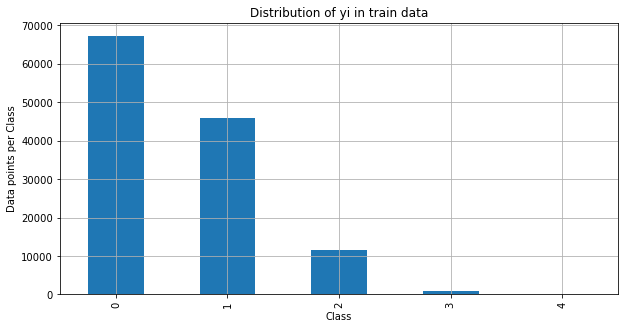

In [4]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareMulticlass()

plotDf(reducedDf['label'])


In [5]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(reducedDf)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(reducedDf_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)

In [6]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

In [7]:
y_probe=y_probe.replace(2, 1)
y_r2l=y_r2l.replace(3, 1)
y_u2r=y_u2r.replace(4, 1)

y_probe_test=y_probe_test.replace(2, 1)
y_r2l_test=y_r2l_test.replace(3, 1)
y_u2r_test=y_u2r_test.replace(4, 1)

## No feature selection

#### K-fold cross validation on dos

In [8]:
KfoldCVNN(modelNN(X_dos, y_dos, 38), pd.DataFrame(X_dos), y_dos, 10, 1)

3186/3186 [==============================] - 4s 1ms/step
>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
3186/3186 [==============================] - 4s 1ms/step
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
3186/3186 [==============================] - 5s 1ms/step
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
3186/3186 [==============================] - 3s 1ms/step
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
3186/3186 [==============================] - 3s 806us/step
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
3186/3186 [==============================] - 3s 841us/step
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
3186/3186 [==============================] - 4s 1ms/step
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
3186/3186 [==============================] - 5s 1ms/step
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
3186/3186 [==============================] - 6s 2ms/step
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
3186/3186 [==============================] - 4s 1ms/step
>Tr

{'Mean Training Accuracy': 0.9883326957221191,
 'Mean Training Precision': 0.9796534110199226,
 'Mean Training Recall': 0.9919207899749465,
 'Mean Training F1 Score': 0.9857195756615008,
 'Mean Validation Accuracy': 0.9879668049792532,
 'Mean Validation Precision': 0.9788456742506476,
 'Mean Validation Recall': 0.9918844183838618,
 'Mean Validation F1 Score': 0.985298699709506}

#### K-fold cross validation on dos Standard Scaler

In [9]:
KfoldCVNN(modelNN(X_dos, y_dos, 38), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

3186/3186 [==============================] - 4s 1ms/step
>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
3186/3186 [==============================] - 3s 1ms/step
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
3186/3186 [==============================] - 5s 1ms/step
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
3186/3186 [==============================] - 4s 1ms/step
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
3186/3186 [==============================] - 4s 1ms/step
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
3186/3186 [==============================] - 3s 878us/step
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
3186/3186 [==============================] - 3s 814us/step
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
3186/3186 [==============================] - 3s 1ms/step
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
3186/3186 [==============================] - 5s 1ms/step
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
3186/3186 [==============================] - 4s 1ms/step
>Tr

{'Mean Training Accuracy': 0.9968521624829562,
 'Mean Training Precision': 0.9935563942864276,
 'Mean Training Recall': 0.9987151281383027,
 'Mean Training F1 Score': 0.9961285138875822,
 'Mean Validation Accuracy': 0.996795267943851,
 'Mean Validation Precision': 0.9936027999134153,
 'Mean Validation Recall': 0.9985412917578801,
 'Mean Validation F1 Score': 0.9960649147367671}

#### Stratified cross validation on dos

In [10]:
stratifiedCVNN(modelNN(X_dos, y_dos, 38), pd.DataFrame(X_dos), y_dos, 10, 1)

3186/3186 [==============================] - 5s 1ms/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 5s 1ms/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 3s 941us/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 5s 2ms/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 934us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 819us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 5s 1ms/step
>

{'Mean Training Accuracy': 0.9862766447916975,
 'Mean Training Precision': 0.9834451633749296,
 'Mean Training Recall': 0.982735878448891,
 'Mean Training F1 Score': 0.9830704323126349,
 'Mean Validation Accuracy': 0.9864129954974838,
 'Mean Validation Precision': 0.9833013222436569,
 'Mean Validation Recall': 0.9832126281396245,
 'Mean Validation F1 Score': 0.9832396744243574}

#### Stratified cross validation on dos Standard Scaler

In [11]:
stratifiedCVNN(modelNN(X_dos, y_dos, 38), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

3186/3186 [==============================] - 5s 1ms/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 5s 1ms/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 4s 1ms/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 888us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 797us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 896us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 5s 1ms/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 4s 1ms/step
>

{'Mean Training Accuracy': 0.9969659515611664,
 'Mean Training Precision': 0.9939066986515694,
 'Mean Training Recall': 0.998640356918821,
 'Mean Training F1 Score': 0.9962675253961816,
 'Mean Validation Accuracy': 0.9968923810364615,
 'Mean Validation Precision': 0.9937631323215033,
 'Mean Validation Recall': 0.9986064851375863,
 'Mean Validation F1 Score': 0.996177704919813}

#### Predict on dos

Epoch 1/40
1133/1133 [==============================] - 4s 2ms/step - loss: 12.3911 - accuracy: 0.3982 - precision: 0.9554
Epoch 2/40
1133/1133 [==============================] - 1s 1ms/step - loss: 10.5607 - accuracy: 0.3536 - precision: 0.9760
Epoch 3/40
1133/1133 [==============================] - 1s 1ms/step - loss: 5.6721 - accuracy: 0.4060 - precision: 0.9768
Epoch 4/40
1133/1133 [==============================] - 2s 2ms/step - loss: 5.6592 - accuracy: 0.3981 - precision: 0.9827
Epoch 5/40
1133/1133 [==============================] - 3s 3ms/step - loss: 26.4476 - accuracy: 0.4919 - precision: 0.9759
Epoch 6/40
1133/1133 [==============================] - 3s 2ms/step - loss: 14.1635 - accuracy: 0.5311 - precision: 0.9804
Epoch 7/40
1133/1133 [==============================] - 2s 2ms/step - loss: 11.6993 - accuracy: 0.4516 - precision: 0.9868
Epoch 8/40
1133/1133 [==============================] - 2s 1ms/step - loss: 6.4867 - accuracy: 0.3219 - precision: 0.9858
Epoch 9/40
1133/113

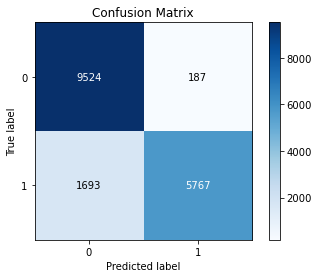

Accuracy: 0.89051 
Precision: 0.96859 
Recall: 0.77306 
F-measure: 0.85985 


In [12]:
y_dos_prediction = NN(X_dos, y_dos, 38).predict(X_dos_test) > 0.5
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

Epoch 1/40
1133/1133 [==============================] - 4s 1ms/step - loss: 0.0274 - accuracy: 5.2088e-04 - precision_1: 0.9909
Epoch 2/40
1133/1133 [==============================] - 2s 1ms/step - loss: 0.0096 - accuracy: 0.0103 - precision_1: 0.9936
Epoch 3/40
1133/1133 [==============================] - 2s 2ms/step - loss: 0.0083 - accuracy: 0.1934 - precision_1: 0.9939
Epoch 4/40
1133/1133 [==============================] - 2s 2ms/step - loss: 0.0077 - accuracy: 0.2208 - precision_1: 0.9940
Epoch 5/40
1133/1133 [==============================] - 2s 1ms/step - loss: 0.0073 - accuracy: 0.2903 - precision_1: 0.9940
Epoch 6/40
1133/1133 [==============================] - 2s 1ms/step - loss: 0.0071 - accuracy: 0.2791 - precision_1: 0.9944
Epoch 7/40
1133/1133 [==============================] - 2s 2ms/step - loss: 0.0071 - accuracy: 0.2732 - precision_1: 0.9940
Epoch 8/40
1133/1133 [==============================] - 2s 2ms/step - loss: 0.0069 - accuracy: 0.2761 - precision_1: 0.9942
Epoc

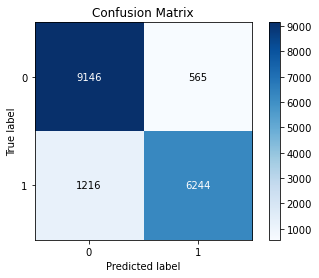

Accuracy: 0.89628 
Precision: 0.91702 
Recall: 0.83700 
F-measure: 0.87518 


In [13]:
y_dos_prediction = NN(X_dos_ss, y_dos, 38).predict(X_dos_test_ss) > 0.5
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [14]:
y_probe=y_probe.replace(2, 1)
y_probe_test=y_probe_test.replace(2, 1)

In [15]:
KfoldCVNN(modelNN(X_probe, y_probe, 38), pd.DataFrame(X_probe), y_probe, 10, 1)

2222/2222 [==============================] - 2s 879us/step
>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
2222/2222 [==============================] - 3s 2ms/step
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
2222/2222 [==============================] - 3s 997us/step
>Tr

{'Mean Training Accuracy': 0.9452889915843855,
 'Mean Training Precision': 0.8138601319464754,
 'Mean Training Recall': 0.9286120546364411,
 'Mean Training F1 Score': 0.8612332440732677,
 'Mean Validation Accuracy': 0.9442149254592394,
 'Mean Validation Precision': 0.8113129280405719,
 'Mean Validation Recall': 0.9269789200243002,
 'Mean Validation F1 Score': 0.8587597843034759}

#### K-fold cross validation on probe Standard Scaler

In [16]:
KfoldCVNN(modelNN(X_probe_ss, y_probe, 38), pd.DataFrame(X_probe_ss), y_probe, 10, 1)

2222/2222 [==============================] - 2s 808us/step
>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
2222/2222 [==============================] - 2s 785us/step
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
2222/2222 [==============================] - 2s 877us/step
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
2222/2222 [==============================] - 2s 992us/step
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
2222/2222 [==============================] - 2s 984us/step
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
2222/2222 [==============================] - 3s 942us/

{'Mean Training Accuracy': 0.9941560433285028,
 'Mean Training Precision': 0.9887023091903586,
 'Mean Training Recall': 0.9715447431236391,
 'Mean Training F1 Score': 0.9800253883693791,
 'Mean Validation Accuracy': 0.9937721006184086,
 'Mean Validation Precision': 0.9879885783175919,
 'Mean Validation Recall': 0.9695185217305251,
 'Mean Validation F1 Score': 0.9786304550525322}

#### Stratified cross validation on probe

In [17]:
stratifiedCVNN(modelNN(X_probe, y_probe, 38), pd.DataFrame(X_probe), y_probe, 10, 1)

2222/2222 [==============================] - 2s 756us/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 2s 755us/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 2s 751us/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 2s 807us/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 980us/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 900us/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 820us/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 3s 1m

{'Mean Training Accuracy': 0.9316643226559014,
 'Mean Training Precision': 0.7768157943535412,
 'Mean Training Recall': 0.9014607236544574,
 'Mean Training F1 Score': 0.8136863683741564,
 'Mean Validation Accuracy': 0.9326580099067178,
 'Mean Validation Precision': 0.7799891427908895,
 'Mean Validation Recall': 0.9016956838610415,
 'Mean Validation F1 Score': 0.8152913089472179}

#### Stratified cross validation on probe Standard Scaler

In [18]:
stratifiedCVNN(modelNN(X_probe_ss, y_probe, 38), pd.DataFrame(X_probe_ss), y_probe, 10, 1)

2222/2222 [==============================] - 2s 808us/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 2s 853us/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 3s 876us/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 812us/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 826us/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 940us/

{'Mean Training Accuracy': 0.9944078038093078,
 'Mean Training Precision': 0.9857790773015115,
 'Mean Training Recall': 0.9762830094777322,
 'Mean Training F1 Score': 0.9809596087782657,
 'Mean Validation Accuracy': 0.9937974234841457,
 'Mean Validation Precision': 0.9834849330916594,
 'Mean Validation Recall': 0.9745204985313496,
 'Mean Validation F1 Score': 0.9788967295200699}

#### Predict on probe

Epoch 1/40
790/790 [==============================] - 2s 1ms/step - loss: 8617.9258 - accuracy: 0.6327 - precision_2: 0.5350
Epoch 2/40
790/790 [==============================] - 2s 2ms/step - loss: 15957.3994 - accuracy: 0.7790 - precision_2: 0.4940
Epoch 3/40
790/790 [==============================] - 2s 2ms/step - loss: 17313.8965 - accuracy: 0.8543 - precision_2: 0.6029
Epoch 4/40
790/790 [==============================] - 1s 2ms/step - loss: 9518.8428 - accuracy: 0.8396 - precision_2: 0.6850
Epoch 5/40
790/790 [==============================] - 1s 1ms/step - loss: 7602.6548 - accuracy: 0.8333 - precision_2: 0.7933
Epoch 6/40
790/790 [==============================] - 1s 1ms/step - loss: 9076.0703 - accuracy: 0.8600 - precision_2: 0.8022
Epoch 7/40
790/790 [==============================] - 2s 2ms/step - loss: 17095.1816 - accuracy: 0.8676 - precision_2: 0.6210
Epoch 8/40
790/790 [==============================] - 1s 2ms/step - loss: 6812.6182 - accuracy: 0.9520 - precision_2: 0.86

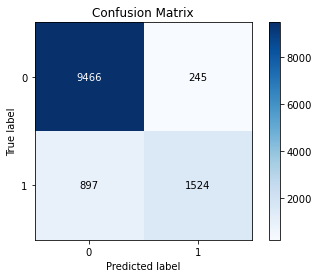

Accuracy: 0.90587 
Precision: 0.86150 
Recall: 0.62949 
F-measure: 0.72745 


In [19]:
y_probe_prediction = NN(X_probe, y_probe, 38).predict(X_probe_test) > 0.5
plotConfusionMatrix(y_probe_prediction, y_probe_test, 1)

Epoch 1/40
790/790 [==============================] - 2s 1ms/step - loss: 0.0542 - accuracy: 6.5824e-04 - precision_3: 0.9558
Epoch 2/40
790/790 [==============================] - 1s 1ms/step - loss: 0.0255 - accuracy: 0.0070 - precision_3: 0.9749
Epoch 3/40
790/790 [==============================] - 2s 2ms/step - loss: 0.0202 - accuracy: 0.0177 - precision_3: 0.9812
Epoch 4/40
790/790 [==============================] - 2s 2ms/step - loss: 0.0184 - accuracy: 0.0258 - precision_3: 0.9838
Epoch 5/40
790/790 [==============================] - 1s 1ms/step - loss: 0.0166 - accuracy: 0.0342 - precision_3: 0.9856
Epoch 6/40
790/790 [==============================] - 1s 1ms/step - loss: 0.0158 - accuracy: 0.0403 - precision_3: 0.9848
Epoch 7/40
790/790 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.0441 - precision_3: 0.9876
Epoch 8/40
790/790 [==============================] - 2s 2ms/step - loss: 0.0136 - accuracy: 0.0486 - precision_3: 0.9878
Epoch 9/40
790/790 [

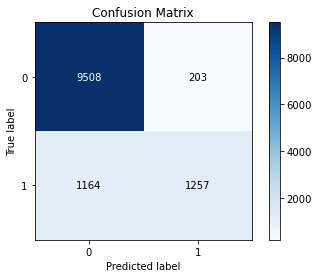

Accuracy: 0.88732 
Precision: 0.86096 
Recall: 0.51921 
F-measure: 0.64777 


In [20]:
y_probe_prediction = NN(X_probe_ss, y_probe, 38).predict(X_probe_test_ss) > 0.5
plotConfusionMatrix(y_probe_prediction, y_probe_test, 1)

#### K-fold cross validation on r2l

In [21]:
y_r2l=y_r2l.replace(3, 1)
y_r2l_test=y_r2l_test.replace(3, 1)

In [22]:
KfoldCVNN(modelNN(X_r2l, y_r2l, 38), pd.DataFrame(X_r2l), y_r2l, 10, 1)

1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60615, 1=889, Test: 0=6728, 1=106
1922/1922 [==============================] - 2s 847us/step
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
1922/1922 [==============================] - 2s 877us/step
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
1922/1922 [==============================] - 2s 903us/step
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
1923/1923 [==============================] - 3s 1ms/step
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
1923/1923 [==============================] - 2s 869us/step
>Train: 0=60608, 1=897, Test:

{'Mean Training Accuracy': 0.9905095786206732,
 'Mean Training Precision': 0.7159403833166562,
 'Mean Training Recall': 0.512356140588462,
 'Mean Training F1 Score': 0.5825539679359703,
 'Mean Validation Accuracy': 0.9903568563120982,
 'Mean Validation Precision': 0.7090909259676976,
 'Mean Validation Recall': 0.513564150829477,
 'Mean Validation F1 Score': 0.5807316326278488}

#### K-fold cross validation on r2l Standard Scaler

In [23]:
KfoldCVNN(modelNN(X_r2l_ss, y_r2l, 38), pd.DataFrame(X_r2l_ss), y_r2l, 10, 1)

1922/1922 [==============================] - 2s 975us/step
>Train: 0=60615, 1=889, Test: 0=6728, 1=106
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
1922/1922 [==============================] - 2s 952us/step
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
1922/1922 [==============================] - 2s 891us/step
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
1922/1922 [==============================] - 2s 901us/step
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
1923/1923 [==============================] - 2s 1ms/step
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
1923/1923 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=897, Test:

{'Mean Training Accuracy': 0.9967628204226691,
 'Mean Training Precision': 0.9167295977450669,
 'Mean Training Recall': 0.8551501021414621,
 'Mean Training F1 Score': 0.8837424643017722,
 'Mean Validation Accuracy': 0.9965026924159688,
 'Mean Validation Precision': 0.9110733264638625,
 'Mean Validation Recall': 0.8496944734434495,
 'Mean Validation F1 Score': 0.8771822244390804}

#### Stratified cross validation on r2l

In [24]:
stratifiedCVNN(modelNN(X_r2l, y_r2l, 38), pd.DataFrame(X_r2l), y_r2l, 10, 1)

1922/1922 [==============================] - 2s 906us/step
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
   1/1922 [..............................] - ETA: 26s - loss: 2.7304e-25

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1922/1922 [==============================] - 2s 868us/step


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60608, 1=896, Test: 0=6735, 1=99
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 2s 870us/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 2s 925us/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 2s 938us/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1923/1923 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
1923/1923 [==============================] - 2s 806us/step
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9892023427904603,
 'Mean Training Precision': 0.6088605916995704,
 'Mean Training Recall': 0.4663675927773344,
 'Mean Training F1 Score': 0.506764418612134,
 'Mean Validation Accuracy': 0.9895960191809609,
 'Mean Validation Precision': 0.6181329103476061,
 'Mean Validation Recall': 0.4770808080808081,
 'Mean Validation F1 Score': 0.5176788379206665}

#### Stratified cross validation on r2l Standard Scaler

In [25]:
stratifiedCVNN(modelNN(X_r2l_ss, y_r2l, 38), pd.DataFrame(X_r2l_ss), y_r2l, 10, 1)

1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
1922/1922 [==============================] - 2s 878us/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 2s 864us/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 2s 870us/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 2s 867us/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 2s 873us/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1923/1923 [==============================] - 2s 803us/step
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
1923/1923 [==============================] - 2s 805us/step
>Train: 0=60609, 1=896, 

{'Mean Training Accuracy': 0.9964685303295899,
 'Mean Training Precision': 0.9107470505853176,
 'Mean Training Recall': 0.8408656723862731,
 'Mean Training F1 Score': 0.8729609931153623,
 'Mean Validation Accuracy': 0.9964002826579561,
 'Mean Validation Precision': 0.9066998616653343,
 'Mean Validation Recall': 0.8403333333333333,
 'Mean Validation F1 Score': 0.870909425709655}

#### Predict on r2l

Epoch 1/40
684/684 [==============================] - 2s 1ms/step - loss: 108.0895 - accuracy: 0.1776 - precision_4: 0.0258
Epoch 2/40
684/684 [==============================] - 1s 1ms/step - loss: 26.1540 - accuracy: 0.1920 - precision_4: 0.0374
Epoch 3/40
684/684 [==============================] - 1s 1ms/step - loss: 14.4749 - accuracy: 0.0888 - precision_4: 0.0783
Epoch 4/40
684/684 [==============================] - 1s 1ms/step - loss: 6.8396 - accuracy: 0.0422 - precision_4: 0.2238
Epoch 5/40
684/684 [==============================] - 1s 1ms/step - loss: 0.3145 - accuracy: 0.0535 - precision_4: 0.7081
Epoch 6/40
684/684 [==============================] - 1s 1ms/step - loss: 0.0347 - accuracy: 0.0577 - precision_4: 0.8531
Epoch 7/40
684/684 [==============================] - 1s 1ms/step - loss: 0.0248 - accuracy: 0.0671 - precision_4: 0.8988
Epoch 8/40
684/684 [==============================] - 1s 1ms/step - loss: 0.0298 - accuracy: 0.0776 - precision_4: 0.8968
Epoch 9/40
684/684 [

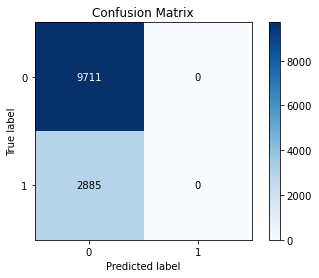

Accuracy: 0.77096 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
y_r2l_prediction = NN(X_r2l, y_r2l, 38).predict(X_r2l_test) > 0.5
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 1)

Epoch 1/40
684/684 [==============================] - 2s 1ms/step - loss: 0.0346 - accuracy: 1.4633e-05 - precision_5: 0.8242
Epoch 2/40
684/684 [==============================] - 1s 1ms/step - loss: 0.0143 - accuracy: 2.9266e-05 - precision_5: 0.8571
Epoch 3/40
684/684 [==============================] - 1s 1ms/step - loss: 0.0133 - accuracy: 2.9266e-05 - precision_5: 0.8705
Epoch 4/40
684/684 [==============================] - 1s 1ms/step - loss: 0.0117 - accuracy: 4.3899e-05 - precision_5: 0.8665
Epoch 5/40
684/684 [==============================] - 1s 2ms/step - loss: 0.0106 - accuracy: 4.3899e-05 - precision_5: 0.8807
Epoch 6/40
684/684 [==============================] - 1s 1ms/step - loss: 0.0100 - accuracy: 4.3899e-05 - precision_5: 0.8912
Epoch 7/40
684/684 [==============================] - 1s 1ms/step - loss: 0.0088 - accuracy: 5.8533e-05 - precision_5: 0.9054
Epoch 8/40
684/684 [==============================] - 1s 1ms/step - loss: 0.0089 - accuracy: 7.3166e-05 - precision_5:

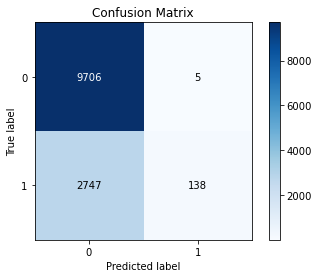

Accuracy: 0.78152 
Precision: 0.96503 
Recall: 0.04783 
F-measure: 0.09115 


In [27]:
y_r2l_prediction = NN(X_r2l_ss, y_r2l, 38).predict(X_r2l_test_ss) > 0.5
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 1)

#### K-fold cross validation on u2r

In [28]:
y_u2r=y_u2r.replace(4, 1)
y_u2r_test=y_u2r_test.replace(4, 1)

In [29]:
KfoldCVNN(modelNN(X_u2r, y_u2r, 38), pd.DataFrame(X_u2r), y_u2r, 10, 1)

1896/1896 [==============================] - 2s 814us/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
   1/1896 [..............................] - ETA: 9s - loss: 2.1791e-16

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 812us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
   1/1896 [..............................] - ETA: 9s - loss: 2.6356e-11

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 812us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 810us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 803us/step
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
1896/1896 [==============================] - 2s 809us/step
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
1896/1896 [==============================] - 2s 809us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 807us/step
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
1896/1896 [==============================] - 2s 804us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
   1/1896 [..............................] - ETA: 9s - loss: 2.3684e-05

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 833us/step
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Mean Training Accuracy': 0.9974907320552188,
 'Mean Training Precision': 0.3372802075375605,
 'Mean Training Recall': 0.16017313514422674,
 'Mean Training F1 Score': 0.1692653236874935,
 'Mean Validation Accuracy': 0.9972699768344324,
 'Mean Validation Precision': 0.31810551558753,
 'Mean Validation Recall': 0.16499999999999998,
 'Mean Validation F1 Score': 0.17894909688013136}

#### K-fold cross validation on u2r Standard Scaler

In [30]:
KfoldCVNN(modelNN(X_u2r_ss, y_u2r, 38), pd.DataFrame(X_u2r_ss), y_u2r, 10, 1)

1896/1896 [==============================] - 2s 877us/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
  44/1896 [..............................] - ETA: 2s - loss: 3.0859e-04

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 816us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 814us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 804us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 809us/step
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
1896/1896 [==============================] - 2s 807us/step
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
1896/1896 [==============================] - 2s 824us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 817us/step
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
1896/1896 [==============================] - 2s 852us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 809us/step
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9996026732623708,
 'Mean Training Precision': 0.9204150107375915,
 'Mean Training Recall': 0.5330176398202036,
 'Mean Training F1 Score': 0.6557139757220313,
 'Mean Validation Accuracy': 0.9995103505305712,
 'Mean Validation Precision': 0.753095238095238,
 'Mean Validation Recall': 0.5125,
 'Mean Validation F1 Score': 0.5888888888888889}

#### Stratified cross validation on u2r

In [31]:
stratifiedCVNN(modelNN(X_u2r, y_u2r, 38), pd.DataFrame(X_u2r), y_u2r, 10, 1)

1896/1896 [==============================] - 2s 796us/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
1896/1896 [==============================] - 2s 841us/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
1896/1896 [==============================] - 2s 796us/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
   1/1896 [..............................] - ETA: 11s - loss: 1.9661e-04

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 795us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
   1/1896 [..............................] - ETA: 9s - loss: 0.0051

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 802us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 802us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
   1/1896 [..............................] - ETA: 11s - loss: 1.1202e-24

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 797us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
   1/1896 [..............................] - ETA: 11s - loss: 4.0481e-15

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 795us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
   1/1896 [..............................] - ETA: 11s - loss: 4.1531e-17

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 837us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
   1/1896 [..............................] - ETA: 9s - loss: 1.6853e-31

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 797us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Mean Training Accuracy': 0.9991954560346571,
 'Mean Training Precision': 0.21394557823129254,
 'Mean Training Recall': 0.05578168362627197,
 'Mean Training F1 Score': 0.06989942528735632,
 'Mean Validation Accuracy': 0.9991839212203381,
 'Mean Validation Precision': 0.12,
 'Mean Validation Recall': 0.03666666666666667,
 'Mean Validation F1 Score': 0.04857142857142858}

#### Stratified cross validation on u2r Standard Scaler

In [32]:
stratifiedCVNN(modelNN(X_u2r_ss, y_u2r, 38), pd.DataFrame(X_u2r_ss), y_u2r, 10, 1)

1896/1896 [==============================] - 2s 817us/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
1896/1896 [==============================] - 2s 794us/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
1896/1896 [==============================] - 2s 804us/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
  44/1896 [..............................] - ETA: 2s - loss: 0.0030    

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 810us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 795us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 811us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 804us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 809us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 794us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 815us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9996026736428997,
 'Mean Training Precision': 0.9058701083072525,
 'Mean Training Recall': 0.5559666975023128,
 'Mean Training F1 Score': 0.6719046759077661,
 'Mean Validation Accuracy': 0.9995251917290867,
 'Mean Validation Precision': 0.7157142857142857,
 'Mean Validation Recall': 0.51,
 'Mean Validation F1 Score': 0.5811172161172161}

#### Predict on u2r

Epoch 1/40
674/674 [==============================] - 2s 1ms/step - loss: 2.2492 - accuracy: 0.5924 - precision_6: 0.0045
Epoch 2/40
674/674 [==============================] - 1s 1ms/step - loss: 0.1653 - accuracy: 0.6362 - precision_6: 0.0986
Epoch 3/40
674/674 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.6666 - precision_6: 0.0541
Epoch 4/40
674/674 [==============================] - 1s 1ms/step - loss: 0.1860 - accuracy: 0.7019 - precision_6: 0.0769
Epoch 5/40
674/674 [==============================] - 1s 1ms/step - loss: 0.1717 - accuracy: 0.6116 - precision_6: 0.1860
Epoch 6/40
674/674 [==============================] - 1s 1ms/step - loss: 0.0914 - accuracy: 0.7176 - precision_6: 0.4103
Epoch 7/40
674/674 [==============================] - 1s 1ms/step - loss: 0.3548 - accuracy: 0.8103 - precision_6: 0.0857
Epoch 8/40
674/674 [==============================] - 1s 1ms/step - loss: 0.1952 - accuracy: 0.7139 - precision_6: 0.1739
Epoch 9/40
674/674 [====

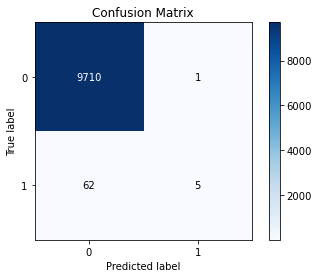

Accuracy: 0.99356 
Precision: 0.83333 
Recall: 0.07463 
F-measure: 0.13699 


In [33]:
y_u2r_prediction = NN(X_u2r, y_u2r, 38).predict(X_u2r_test) > 0.5
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 1)

Epoch 1/40
674/674 [==============================] - 2s 1ms/step - loss: 0.0135 - accuracy: 1.1870e-04 - precision_7: 0.5000
Epoch 2/40
674/674 [==============================] - 1s 1ms/step - loss: 0.0028 - accuracy: 1.3354e-04 - precision_7: 0.7000
Epoch 3/40
674/674 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 2.0773e-04 - precision_7: 0.8571
Epoch 4/40
674/674 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 2.5224e-04 - precision_7: 0.7576
Epoch 5/40
674/674 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 2.6708e-04 - precision_7: 0.8125
Epoch 6/40
674/674 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 3.4127e-04 - precision_7: 0.8571
Epoch 7/40
674/674 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 7.2706e-04 - precision_7: 0.8684
Epoch 8/40
674/674 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 0.0010 - precision_7: 0.8

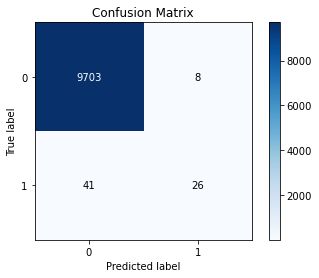

Accuracy: 0.99499 
Precision: 0.76471 
Recall: 0.38806 
F-measure: 0.51485 


In [34]:
y_u2r_prediction = NN(X_u2r_ss, y_u2r, 38).predict(X_u2r_test_ss) > 0.5
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 1)

## Feature Selection

In [35]:

X_dos_rfe, rfecolname_dos = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_dos, y_dos, 13)
X_probe_rfe, rfecolname_probe = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_probe, y_probe, 13)
X_r2l_rfe, rfecolname_r2l = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_r2l, y_r2l, 13)
X_u2r_rfe, rfecolname_u2r = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_u2r, y_u2r, 13)

X_dos_test_rfe=X_dos_test.values[:,rfecolname_dos]
X_probe_test_rfe=X_probe_test.values[:,rfecolname_probe]
X_r2l_test_rfe=X_r2l_test.values[:,rfecolname_r2l]
X_u2r_test_rfe=X_u2r_test.values[:,rfecolname_u2r]

In [36]:
X_dos_rfe_ss, rfecolname_dosSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_dos_ss, y_dos, 13)
X_probe_rfe_ss, rfecolname_probeSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_probe_ss, y_probe, 13)
X_r2l_rfe_ss, rfecolname_r2lSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_r2l_ss, y_r2l, 13)
X_u2r_rfe_ss, rfecolname_u2rSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_u2r_ss, y_u2r, 13)

X_dos_test_rfe_ss=X_dos_test_ss[:,rfecolname_dosSS]
X_probe_test_rfe_ss=X_probe_test_ss[:,rfecolname_probeSS]
X_r2l_test_rfe_ss=X_r2l_test_ss[:,rfecolname_r2lSS]
X_u2r_test_rfe_ss=X_u2r_test_ss[:,rfecolname_u2rSS]

#### K-fold cross validation on dos

In [37]:
KfoldCVNN(modelNN(X_dos, y_dos, 13), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

3186/3186 [==============================] - 2s 773us/step
>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
3186/3186 [==============================] - 2s 776us/step
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
3186/3186 [==============================] - 2s 762us/step
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
3186/3186 [==============================] - 2s 756us/step
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
3186/3186 [==============================] - 2s 761us/step
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
3186/3186 [==============================] - 3s 823us/step
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
3186/3186 [==============================] - 2s 756us/step
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
3186/3186 [==============================] - 2s 776us/step
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
3186/3186 [==============================] - 3s 797us/step
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
3186/3186 [==============================] - 3

{'Mean Training Accuracy': 0.9852545049684629,
 'Mean Training Precision': 0.9822556877998568,
 'Mean Training Recall': 0.9816152593554068,
 'Mean Training F1 Score': 0.9818275892001802,
 'Mean Validation Accuracy': 0.9851416968305816,
 'Mean Validation Precision': 0.9818126729126474,
 'Mean Validation Recall': 0.9818582399263288,
 'Mean Validation F1 Score': 0.9817286259265691}

#### K-fold cross validation on dos Standard Scaler

In [38]:
KfoldCVNN(modelNN(X_dos, y_dos, 13), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

3186/3186 [==============================] - 3s 789us/step
>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
3186/3186 [==============================] - 2s 773us/step
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
3186/3186 [==============================] - 2s 768us/step
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
3186/3186 [==============================] - 3s 843us/step
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
3186/3186 [==============================] - 2s 770us/step
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
3186/3186 [==============================] - 2s 772us/step
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
3186/3186 [==============================] - 2s 775us/step
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
3186/3186 [==============================] - 3s 804us/step
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
3186/3186 [==============================] - 3s 781us/step
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
3186/3186 [==============================] - 2

{'Mean Training Accuracy': 0.9916002079593497,
 'Mean Training Precision': 0.994207223639977,
 'Mean Training Recall': 0.9850312175064927,
 'Mean Training F1 Score': 0.9895935167105032,
 'Mean Validation Accuracy': 0.9914187339984109,
 'Mean Validation Precision': 0.9940364671433031,
 'Mean Validation Recall': 0.9847523780484135,
 'Mean Validation F1 Score': 0.9893646239460459}

#### Stratified cross validation on dos

In [39]:
stratifiedCVNN(modelNN(X_dos, y_dos, 13), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

3186/3186 [==============================] - 3s 815us/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 3s 792us/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 2s 777us/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 2s 765us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 2s 762us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 2s 766us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 2s 762us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 2s 760us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 2s 734us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 2

{'Mean Training Accuracy': 0.9801869672267836,
 'Mean Training Precision': 0.978476748502857,
 'Mean Training Recall': 0.974822296468421,
 'Mean Training F1 Score': 0.9760244108053986,
 'Mean Validation Accuracy': 0.9799240752185044,
 'Mean Validation Precision': 0.9779947858660842,
 'Mean Validation Recall': 0.974612541922984,
 'Mean Validation F1 Score': 0.9756869905083392}

#### Stratified cross validation on dos Standard Scaler

In [40]:
stratifiedCVNN(modelNN(X_dos, y_dos, 13), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

3186/3186 [==============================] - 2s 774us/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 2s 774us/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 2s 768us/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 2s 771us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 2s 771us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 2s 764us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 2s 769us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 2s 771us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 787us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3

{'Mean Training Accuracy': 0.9914952473441041,
 'Mean Training Precision': 0.9947951038816919,
 'Mean Training Recall': 0.9841826500857114,
 'Mean Training F1 Score': 0.9894544233251212,
 'Mean Validation Accuracy': 0.9917189017392072,
 'Mean Validation Precision': 0.9949079396758231,
 'Mean Validation Recall': 0.9846276829382085,
 'Mean Validation F1 Score': 0.9897328990855252}

#### Predict on dos

Epoch 1/40
1133/1133 [==============================] - 2s 1ms/step - loss: 16.6566 - accuracy: 0.4368 - precision_8: 0.9423
Epoch 2/40
1133/1133 [==============================] - 1s 1ms/step - loss: 13.2111 - accuracy: 0.3874 - precision_8: 0.9590
Epoch 3/40
1133/1133 [==============================] - 2s 1ms/step - loss: 33.6561 - accuracy: 0.4577 - precision_8: 0.9603
Epoch 4/40
1133/1133 [==============================] - 1s 1ms/step - loss: 14.5419 - accuracy: 0.4515 - precision_8: 0.9753
Epoch 5/40
1133/1133 [==============================] - 1s 1ms/step - loss: 12.5037 - accuracy: 0.4176 - precision_8: 0.9678
Epoch 6/40
1133/1133 [==============================] - 1s 1ms/step - loss: 6.8663 - accuracy: 0.4436 - precision_8: 0.9816
Epoch 7/40
1133/1133 [==============================] - 1s 1ms/step - loss: 3.0799 - accuracy: 0.3951 - precision_8: 0.9819
Epoch 8/40
1133/1133 [==============================] - 1s 1ms/step - loss: 12.4512 - accuracy: 0.4296 - precision_8: 0.9654
Ep

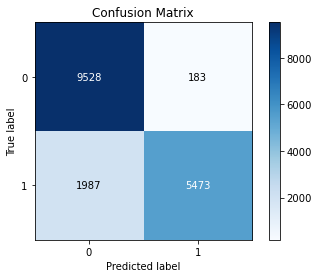

Accuracy: 0.87362 
Precision: 0.96764 
Recall: 0.73365 
F-measure: 0.83455 


In [41]:
y_dos_rfe_prediction = NN(X_dos_rfe, y_dos, 13).predict(X_dos_test_rfe) >0.5
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

Epoch 1/40
1133/1133 [==============================] - 2s 1ms/step - loss: 0.0574 - accuracy: 0.0066 - precision_9: 0.9929
Epoch 2/40
1133/1133 [==============================] - 1s 1ms/step - loss: 0.0305 - accuracy: 0.0088 - precision_9: 0.9952
Epoch 3/40
1133/1133 [==============================] - 1s 1ms/step - loss: 0.0283 - accuracy: 0.0136 - precision_9: 0.9951
Epoch 4/40
1133/1133 [==============================] - 1s 1ms/step - loss: 0.0276 - accuracy: 0.0381 - precision_9: 0.9950
Epoch 5/40
1133/1133 [==============================] - 1s 1ms/step - loss: 0.0265 - accuracy: 0.0243 - precision_9: 0.9948
Epoch 6/40
1133/1133 [==============================] - 1s 1ms/step - loss: 0.0250 - accuracy: 0.1387 - precision_9: 0.9949
Epoch 7/40
1133/1133 [==============================] - 1s 1ms/step - loss: 0.0244 - accuracy: 0.1862 - precision_9: 0.9942
Epoch 8/40
1133/1133 [==============================] - 1s 1ms/step - loss: 0.0238 - accuracy: 0.2258 - precision_9: 0.9937
Epoch 9/

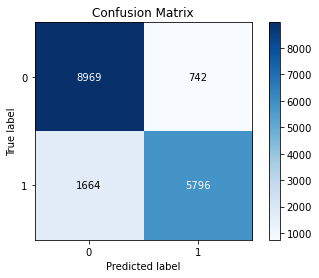

Accuracy: 0.85988 
Precision: 0.88651 
Recall: 0.77694 
F-measure: 0.82812 


In [42]:
y_dos_rfe_prediction = NN(X_dos_rfe_ss, y_dos, 13).predict(X_dos_test_rfe_ss) >0.5
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [43]:
KfoldCVNN(modelNN(X_probe_rfe, y_probe, 13), pd.DataFrame(X_probe_rfe), y_probe, 10, 1)

2222/2222 [==============================] - 2s 750us/step
>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
2222/2222 [==============================] - 2s 754us/step
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
2222/2222 [==============================] - 2s 753us/step
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
2222/2222 [==============================] - 2s 760us/step
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
2222/2222 [==============================] - 2s 754us/step
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
2222/2222 [==============================] - 2s 754us/step
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
2222/2222 [==============================] - 2s 756us/step
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
2222/2222 [==============================] - 2s 761us/step
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
2222/2222 [==============================] - 2s 

{'Mean Training Accuracy': 0.9593032691149197,
 'Mean Training Precision': 0.8312379228470987,
 'Mean Training Recall': 0.8803746901051799,
 'Mean Training F1 Score': 0.8482737502533023,
 'Mean Validation Accuracy': 0.9583540073170612,
 'Mean Validation Precision': 0.8303592172963175,
 'Mean Validation Recall': 0.8791320204498639,
 'Mean Validation F1 Score': 0.8467258746396629}

#### K-fold cross validation on probe Standard Scaler

In [44]:
KfoldCVNN(modelNN(X_probe_rfe_ss, y_probe, 13), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 1)

2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
2222/2222 [==============================] - 2s 992us/step
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
2222/2222 [==============================] - 2s 953us/step
>Tr

{'Mean Training Accuracy': 0.9933529368500637,
 'Mean Training Precision': 0.9802184034381751,
 'Mean Training Recall': 0.9746527315142229,
 'Mean Training F1 Score': 0.9773473971654877,
 'Mean Validation Accuracy': 0.9930885563146112,
 'Mean Validation Precision': 0.9797934644806923,
 'Mean Validation Recall': 0.9732127330001072,
 'Mean Validation F1 Score': 0.976377779422077}

#### Stratified cross validation on probe

In [45]:
stratifiedCVNN(modelNN(X_probe_rfe, y_probe, 13), pd.DataFrame(X_probe_rfe), y_probe, 10, 1)

2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 3s 1ms/step
>Train:

{'Mean Training Accuracy': 0.9318598272937664,
 'Mean Training Precision': 0.7784226374215348,
 'Mean Training Recall': 0.8740844706057459,
 'Mean Training F1 Score': 0.8118917759317128,
 'Mean Validation Accuracy': 0.9325440650234528,
 'Mean Validation Precision': 0.7814126283657369,
 'Mean Validation Recall': 0.8738868807927032,
 'Mean Validation F1 Score': 0.8135471390218362}

#### Stratified cross validation on probe Standard Scaler

In [46]:
stratifiedCVNN(modelNN(X_probe_rfe_ss, y_probe, 13), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 1)

2222/2222 [==============================] - 2s 927us/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 2s 933us/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 2s 914us/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 2s 904us/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 930us/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 871us/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 946us/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 954us/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 917us/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2

{'Mean Training Accuracy': 0.9930660132207247,
 'Mean Training Precision': 0.9772884969795415,
 'Mean Training Recall': 0.9757685061025114,
 'Mean Training F1 Score': 0.9764700196556021,
 'Mean Validation Accuracy': 0.9930505800285566,
 'Mean Validation Precision': 0.9764784142399998,
 'Mean Validation Recall': 0.976491434713153,
 'Mean Validation F1 Score': 0.9764358234325645}

#### Predict on probe

Epoch 1/40
790/790 [==============================] - 2s 2ms/step - loss: 8906.9502 - accuracy: 0.5009 - precision_10: 0.4901
Epoch 2/40
790/790 [==============================] - 1s 2ms/step - loss: 5824.7480 - accuracy: 0.7017 - precision_10: 0.5795
Epoch 3/40
790/790 [==============================] - 1s 2ms/step - loss: 17844.1836 - accuracy: 0.8051 - precision_10: 0.5603
Epoch 4/40
790/790 [==============================] - 1s 2ms/step - loss: 7361.3481 - accuracy: 0.8540 - precision_10: 0.6811
Epoch 5/40
790/790 [==============================] - 1s 2ms/step - loss: 12720.3076 - accuracy: 0.8810 - precision_10: 0.7911
Epoch 6/40
790/790 [==============================] - 1s 2ms/step - loss: 10469.9580 - accuracy: 0.8808 - precision_10: 0.7749
Epoch 7/40
790/790 [==============================] - 1s 2ms/step - loss: 22189.9062 - accuracy: 0.9111 - precision_10: 0.7396
Epoch 8/40
790/790 [==============================] - 1s 2ms/step - loss: 10430.5615 - accuracy: 0.9371 - precisio

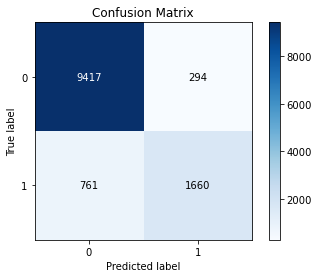

Accuracy: 0.91304 
Precision: 0.84954 
Recall: 0.68567 
F-measure: 0.75886 


In [47]:
y_probe_rfe_prediction = NN(X_probe_rfe, y_probe, 13).predict(X_probe_test_rfe) >0.5
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 1)

Epoch 1/40
790/790 [==============================] - 2s 2ms/step - loss: 0.0593 - accuracy: 2.4051e-04 - precision_11: 0.9574
Epoch 2/40
790/790 [==============================] - 1s 2ms/step - loss: 0.0300 - accuracy: 0.0116 - precision_11: 0.9681
Epoch 3/40
790/790 [==============================] - 1s 2ms/step - loss: 0.0235 - accuracy: 0.0352 - precision_11: 0.9770
Epoch 4/40
790/790 [==============================] - 1s 2ms/step - loss: 0.0209 - accuracy: 0.0390 - precision_11: 0.9795
Epoch 5/40
790/790 [==============================] - 1s 2ms/step - loss: 0.0201 - accuracy: 0.0417 - precision_11: 0.9801
Epoch 6/40
790/790 [==============================] - 1s 2ms/step - loss: 0.0183 - accuracy: 0.0453 - precision_11: 0.9821
Epoch 7/40
790/790 [==============================] - 1s 2ms/step - loss: 0.0180 - accuracy: 0.0468 - precision_11: 0.9822
Epoch 8/40
790/790 [==============================] - 1s 2ms/step - loss: 0.0178 - accuracy: 0.0476 - precision_11: 0.9827
Epoch 9/40
7

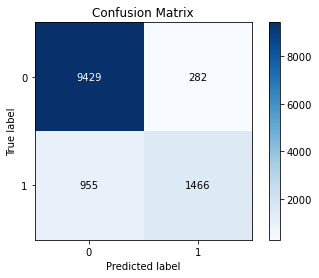

Accuracy: 0.89804 
Precision: 0.83867 
Recall: 0.60553 
F-measure: 0.70329 


In [48]:
y_probe_rfe_prediction = NN(X_probe_rfe_ss, y_probe, 13).predict(X_probe_test_rfe_ss) >0.5
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 1)

#### K-fold cross validation on r2l

In [49]:
KfoldCVNN(modelNN(X_r2l_rfe, y_r2l, 13), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 1)

1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60615, 1=889, Test: 0=6728, 1=106
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
   1/1922 [..............................] - ETA: 11s - loss: 0.0108

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
1923/1923 [==============================] - 2s 975us/step
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
  39/1923 [..............................] - ETA: 2s - loss: 0.0731 

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1923/1923 [==============================] - 2s 969us/step
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Mean Training Accuracy': 0.9854985513231203,
 'Mean Training Precision': 0.6100731053134775,
 'Mean Training Recall': 0.3115443956290219,
 'Mean Training F1 Score': 0.37302289322115983,
 'Mean Validation Accuracy': 0.9857473014915265,
 'Mean Validation Precision': 0.6092691808760986,
 'Mean Validation Recall': 0.31740950362703335,
 'Mean Validation F1 Score': 0.373998674129593}

#### K-fold cross validation on r2l Standard Scaler

In [50]:
KfoldCVNN(modelNN(X_r2l_rfe_ss, y_r2l, 13), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 1)

1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60615, 1=889, Test: 0=6728, 1=106
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
1923/1923 [==============================] - 2s 962us/step
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
1923/1923 [==============================] - 2s 968us/step
>Train: 0=60608, 1=897, Test: 0=6

{'Mean Training Accuracy': 0.9960994503621483,
 'Mean Training Precision': 0.890089304210074,
 'Mean Training Recall': 0.8383791848815276,
 'Mean Training F1 Score': 0.8613166447610701,
 'Mean Validation Accuracy': 0.9957857063285942,
 'Mean Validation Precision': 0.8811930431552927,
 'Mean Validation Recall': 0.8348470255757313,
 'Mean Validation F1 Score': 0.8537346743805736}

#### Stratified cross validation on r2l

In [51]:
stratifiedCVNN(modelNN(X_r2l_rfe, y_r2l, 13), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 1)

1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
   1/1922 [..............................] - ETA: 13s - loss: 3.1648e-16

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
  38/1922 [..............................] - ETA: 2s - loss: 0.0669 

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 2s 993us/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 2s 988us/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1923/1923 [==============================] - 2s 951us/step
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
1923/1923 [==============================] - 2s 965us/step
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9891633469506763,
 'Mean Training Precision': 0.6092003921660287,
 'Mean Training Recall': 0.30286637071029526,
 'Mean Training F1 Score': 0.38128771152804086,
 'Mean Validation Accuracy': 0.9888202259678958,
 'Mean Validation Precision': 0.5789027513262519,
 'Mean Validation Recall': 0.3013030303030303,
 'Mean Validation F1 Score': 0.36869095691392795}

#### Stratified cross validation on r2l Standard Scaler

stratifiedCVNN(modelNN(X_r2l_rfe_ss, y_r2l, 13), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 1)

#### Predict on r2l

Epoch 1/40
684/684 [==============================] - 2s 2ms/step - loss: 92.6307 - accuracy: 0.2869 - precision_12: 0.0348
Epoch 2/40
684/684 [==============================] - 1s 2ms/step - loss: 12.6919 - accuracy: 0.1283 - precision_12: 0.0441
Epoch 3/40
684/684 [==============================] - 1s 2ms/step - loss: 7.3469 - accuracy: 0.0735 - precision_12: 0.0836
Epoch 4/40
684/684 [==============================] - 1s 2ms/step - loss: 2.3829 - accuracy: 0.0080 - precision_12: 0.1744
Epoch 5/40
684/684 [==============================] - 1s 2ms/step - loss: 0.0452 - accuracy: 0.0013 - precision_12: 0.6763
Epoch 6/40
684/684 [==============================] - 1s 2ms/step - loss: 0.0542 - accuracy: 0.0012 - precision_12: 0.8309
Epoch 7/40
684/684 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.0020 - precision_12: 0.8902
Epoch 8/40
684/684 [==============================] - 1s 2ms/step - loss: 0.0406 - accuracy: 0.0018 - precision_12: 0.8550
Epoch 9/40
684

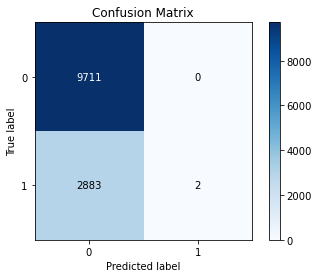

Accuracy: 0.77112 
Precision: 1.00000 
Recall: 0.00069 
F-measure: 0.00139 


In [52]:
y_r2l_rfe_prediction = NN(X_r2l_rfe, y_r2l, 13).predict(X_r2l_test_rfe) >0.5
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 1)

Epoch 1/40
684/684 [==============================] - 2s 2ms/step - loss: 0.0377 - accuracy: 0.0000e+00 - precision_13: 0.7470
Epoch 2/40
684/684 [==============================] - 1s 2ms/step - loss: 0.0169 - accuracy: 0.0000e+00 - precision_13: 0.8171
Epoch 3/40
684/684 [==============================] - 1s 2ms/step - loss: 0.0151 - accuracy: 1.4633e-05 - precision_13: 0.8558
Epoch 4/40
684/684 [==============================] - 1s 2ms/step - loss: 0.0133 - accuracy: 1.4633e-05 - precision_13: 0.8655
Epoch 5/40
684/684 [==============================] - 1s 2ms/step - loss: 0.0123 - accuracy: 1.4633e-05 - precision_13: 0.8728
Epoch 6/40
684/684 [==============================] - 1s 2ms/step - loss: 0.0109 - accuracy: 4.3899e-05 - precision_13: 0.8921
Epoch 7/40
684/684 [==============================] - 1s 2ms/step - loss: 0.0105 - accuracy: 7.3166e-05 - precision_13: 0.9119
Epoch 8/40
684/684 [==============================] - 1s 2ms/step - loss: 0.0094 - accuracy: 1.0243e-04 - preci

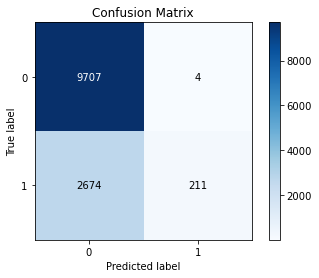

Accuracy: 0.78739 
Precision: 0.98140 
Recall: 0.07314 
F-measure: 0.13613 


In [53]:
y_r2l_rfe_prediction = NN(X_r2l_rfe_ss, y_r2l, 13).predict(X_r2l_test_rfe_ss) >0.5
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 1)

#### K-fold cross validation on u2r

In [54]:
KfoldCVNN(modelNN(X_u2r_rfe, y_u2r, 13), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 1)

1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
  38/1896 [..............................] - ETA: 2s - loss: 0.3743     

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 972us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
   1/1896 [..............................] - ETA: 11s - loss: 0.0172

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 932us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
  34/1896 [..............................] - ETA: 2s - loss: 0.0257     

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 981us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
   1/1896 [..............................] - ETA: 11s - loss: 7.0873e-06

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 988us/step
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
   1/1896 [..............................] - ETA: 11s - loss: 0.0039

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 977us/step
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
   1/1896 [..............................] - ETA: 13s - loss: 0.0010

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 979us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
  36/1896 [..............................] - ETA: 2s - loss: 0.1275    

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 991us/step
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
  35/1896 [..............................] - ETA: 2s - loss: 0.0060     

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 975us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
  35/1896 [..............................] - ETA: 2s - loss: 0.0058     

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 986us/step
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Mean Training Accuracy': 0.9992218347610381,
 'Mean Training Precision': 0.0,
 'Mean Training Recall': 0.0,
 'Mean Training F1 Score': 0.0,
 'Mean Validation Accuracy': 0.9992284316060946,
 'Mean Validation Precision': 0.0,
 'Mean Validation Recall': 0.0,
 'Mean Validation F1 Score': 0.0}

#### K-fold cross validation on u2r Standard Scaler

In [55]:
KfoldCVNN(modelNN(X_u2r_rfe_ss, y_u2r, 13), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 1)

1896/1896 [==============================] - 2s 948us/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
  36/1896 [..............................] - ETA: 2s - loss: 0.0013     

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 942us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 975us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 941us/step
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
1896/1896 [==============================] - 2s 915us/step
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
1896/1896 [==============================] - 2s 911us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 974us/step
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 998us/step
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9995416731456246,
 'Mean Training Precision': 0.7732158717719063,
 'Mean Training Recall': 0.4936218375585034,
 'Mean Training F1 Score': 0.5973054802611533,
 'Mean Validation Accuracy': 0.9995400285243388,
 'Mean Validation Precision': 0.7833333333333333,
 'Mean Validation Recall': 0.5075,
 'Mean Validation F1 Score': 0.6044660894660894}

#### Stratified cross validation on u2r

In [56]:
stratifiedCVNN(modelNN(X_u2r_rfe, y_u2r, 13), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 1)

1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
   1/1896 [..............................] - ETA: 13s - loss: 1.4496e-09

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
   1/1896 [..............................] - ETA: 13s - loss: 0.0033

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
   1/1896 [..............................] - ETA: 13s - loss: 1.2574e-14

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
   1/1896 [..............................] - ETA: 17s - loss: 5.3184e-07

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
   1/1896 [..............................] - ETA: 13s - loss: 9.1020e-12

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Mean Training Accuracy': 0.9991344569779557,
 'Mean Training Precision': 0.23014675052410904,
 'Mean Training Recall': 0.1172062904717854,
 'Mean Training F1 Score': 0.12553298600357424,
 'Mean Validation Accuracy': 0.9991690734169276,
 'Mean Validation Precision': 0.27666666666666667,
 'Mean Validation Recall': 0.11666666666666667,
 'Mean Validation F1 Score': 0.14904761904761904}

#### Stratified cross validation on u2r Standard Scaler

In [57]:
stratifiedCVNN(modelNN(X_u2r_rfe_ss, y_u2r, 13), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 1)

1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
1896/1896 [==============================] - 2s 996us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9995812410857026,
 'Mean Training Precision': 0.8314777446066145,
 'Mean Training Recall': 0.5854764107308047,
 'Mean Training F1 Score': 0.6810042324830363,
 'Mean Validation Accuracy': 0.9995548675212227,
 'Mean Validation Precision': 0.7983333333333333,
 'Mean Validation Recall': 0.5733333333333334,
 'Mean Validation F1 Score': 0.6493506493506493}

#### Predict on u2r

Epoch 1/40
674/674 [==============================] - 3s 2ms/step - loss: 0.3767 - accuracy: 0.6227 - precision_14: 0.0115
Epoch 2/40
674/674 [==============================] - 2s 2ms/step - loss: 0.3335 - accuracy: 0.6134 - precision_14: 0.0000e+00
Epoch 3/40
674/674 [==============================] - 2s 2ms/step - loss: 0.2009 - accuracy: 0.5923 - precision_14: 0.1500
Epoch 4/40
674/674 [==============================] - 2s 2ms/step - loss: 0.2031 - accuracy: 0.6969 - precision_14: 0.0833
Epoch 5/40
674/674 [==============================] - 1s 2ms/step - loss: 0.1015 - accuracy: 0.6521 - precision_14: 0.0857
Epoch 6/40
674/674 [==============================] - 2s 2ms/step - loss: 0.0715 - accuracy: 0.6163 - precision_14: 0.1538
Epoch 7/40
674/674 [==============================] - 2s 2ms/step - loss: 0.1476 - accuracy: 0.6513 - precision_14: 0.0175
Epoch 8/40
674/674 [==============================] - 2s 2ms/step - loss: 0.0264 - accuracy: 0.5772 - precision_14: 0.1667
Epoch 9/40
6

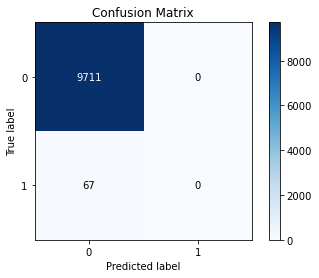

Accuracy: 0.99315 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
y_u2r_rfe_prediction = NN(X_u2r_rfe, y_u2r,13).predict(X_u2r_test_rfe) >0.5
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 1)

Epoch 1/40
674/674 [==============================] - 3s 2ms/step - loss: 0.0197 - accuracy: 1.7805e-04 - precision_15: 0.2222
Epoch 2/40
674/674 [==============================] - 2s 2ms/step - loss: 0.0029 - accuracy: 1.9289e-04 - precision_15: 0.6923
Epoch 3/40
674/674 [==============================] - 2s 3ms/step - loss: 0.0025 - accuracy: 2.3741e-04 - precision_15: 0.7333
Epoch 4/40
674/674 [==============================] - 2s 2ms/step - loss: 0.0024 - accuracy: 2.8192e-04 - precision_15: 0.5806
Epoch 5/40
674/674 [==============================] - 2s 2ms/step - loss: 0.0023 - accuracy: 3.4127e-04 - precision_15: 0.7879
Epoch 6/40
674/674 [==============================] - 2s 2ms/step - loss: 0.0023 - accuracy: 5.3416e-04 - precision_15: 0.7931
Epoch 7/40
674/674 [==============================] - 2s 2ms/step - loss: 0.0021 - accuracy: 6.8254e-04 - precision_15: 0.8529
Epoch 8/40
674/674 [==============================] - 2s 2ms/step - loss: 0.0018 - accuracy: 8.6060e-04 - preci

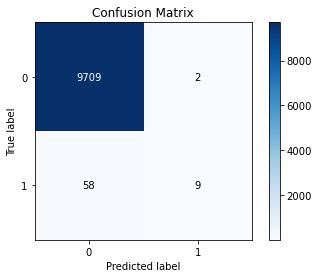

Accuracy: 0.99386 
Precision: 0.81818 
Recall: 0.13433 
F-measure: 0.23077 


In [59]:
y_u2r_rfe_prediction = NN(X_u2r_rfe_ss, y_u2r,13).predict(X_u2r_test_rfe_ss) >0.5
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 1)

## Binary dataset no feature selection

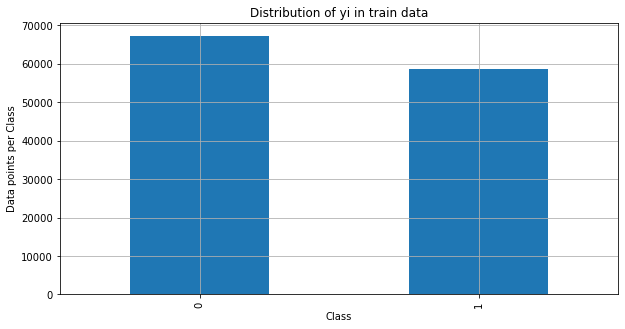

In [60]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareBinary()
plotDf(reducedDf['label'])

x_df, y_df = getXandY(reducedDf)
x_df_test, y_df_test = getXandY(reducedDf_test)

x_df_ss = standardScaler(x_df)
x_df_test_ss = standardScaler(x_df_test)

#### K-fold cross validation

In [61]:
KfoldCVNN(modelNN(x_df, y_df, 38), pd.DataFrame(x_df), y_df, 10, 1)

3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
3543/3543 [==============================] - 5s 2ms/step
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
3543/3543 [==============================] - 6s 2ms/step
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
3543/3543 [==============================] - 5s 2ms/step
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
3543/3543 [==============================] - 6s 2ms/step
>Train:

{'Mean Training Accuracy': 0.9559914635937565,
 'Mean Training Precision': 0.9493179372277707,
 'Mean Training Recall': 0.9577545709840385,
 'Mean Training F1 Score': 0.9531843199572707,
 'Mean Validation Accuracy': 0.9556253027231024,
 'Mean Validation Precision': 0.9478031595268632,
 'Mean Validation Recall': 0.958511202071761,
 'Mean Validation F1 Score': 0.952779128071285}

#### K-fold cross validation Standard Scaler

In [62]:
KfoldCVNN(modelNN(x_df_ss, y_df, 38), pd.DataFrame(x_df_ss), y_df, 10, 1)

3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
3543/3543 [==============================] - 4s 1ms/step
>Train:

{'Mean Training Accuracy': 0.9902765691608624,
 'Mean Training Precision': 0.9913464580522694,
 'Mean Training Recall': 0.9877288368650012,
 'Mean Training F1 Score': 0.989529828272602,
 'Mean Validation Accuracy': 0.9900455469210302,
 'Mean Validation Precision': 0.9913612010534807,
 'Mean Validation Recall': 0.9872442024404098,
 'Mean Validation F1 Score': 0.9892921333065388}

#### Predict

Epoch 1/40
1260/1260 [==============================] - 5s 3ms/step - loss: 225.0273 - accuracy: 0.1095 - precision_16: 0.8871
Epoch 2/40
1260/1260 [==============================] - 3s 3ms/step - loss: 2704.0898 - accuracy: 0.3876 - precision_16: 0.8952
Epoch 3/40
1260/1260 [==============================] - 3s 2ms/step - loss: 7347.0039 - accuracy: 0.7140 - precision_16: 0.8772
Epoch 4/40
1260/1260 [==============================] - 3s 3ms/step - loss: 6456.0693 - accuracy: 0.7063 - precision_16: 0.9019
Epoch 5/40
1260/1260 [==============================] - 3s 3ms/step - loss: 9148.7227 - accuracy: 0.8393 - precision_16: 0.8705
Epoch 6/40
1260/1260 [==============================] - 3s 3ms/step - loss: 4605.1914 - accuracy: 0.8870 - precision_16: 0.9185
Epoch 7/40
1260/1260 [==============================] - 3s 3ms/step - loss: 5683.5063 - accuracy: 0.8833 - precision_16: 0.9341
Epoch 8/40
1260/1260 [==============================] - 3s 3ms/step - loss: 11626.9238 - accuracy: 0.8817

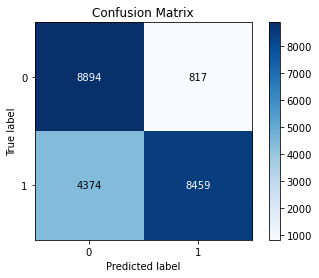

Accuracy: 0.76974 
Precision: 0.91192 
Recall: 0.65916 
F-measure: 0.76521 


In [63]:
y_prediction = NN(x_df, y_df, 38).predict(x_df_test) >0.5
plotConfusionMatrix(y_prediction, y_df_test, 1)

Epoch 1/40
1260/1260 [==============================] - 4s 2ms/step - loss: 0.0617 - accuracy: 4.5248e-04 - precision_17: 0.9809
Epoch 2/40
1260/1260 [==============================] - 3s 2ms/step - loss: 0.0356 - accuracy: 0.0074 - precision_17: 0.9868
Epoch 3/40
1260/1260 [==============================] - 3s 3ms/step - loss: 0.0297 - accuracy: 0.0347 - precision_17: 0.9887
Epoch 4/40
1260/1260 [==============================] - 3s 3ms/step - loss: 0.0262 - accuracy: 0.1031 - precision_17: 0.9891
Epoch 5/40
1260/1260 [==============================] - 3s 3ms/step - loss: 0.0237 - accuracy: 0.1623 - precision_17: 0.9899
Epoch 6/40
1260/1260 [==============================] - 3s 3ms/step - loss: 0.0219 - accuracy: 0.2447 - precision_17: 0.9905
Epoch 7/40
1260/1260 [==============================] - 3s 3ms/step - loss: 0.0205 - accuracy: 0.2425 - precision_17: 0.9910
Epoch 8/40
1260/1260 [==============================] - 3s 3ms/step - loss: 0.0199 - accuracy: 0.2781 - precision_17: 0.9

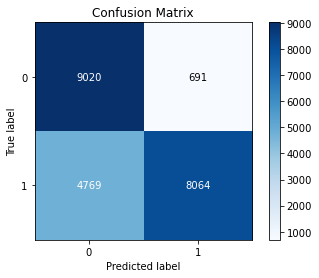

Accuracy: 0.75781 
Precision: 0.92107 
Recall: 0.62838 
F-measure: 0.74708 


In [64]:
y_prediction = NN(x_df_ss, y_df, 38).predict(x_df_test_ss) >0.5
plotConfusionMatrix(y_prediction, y_df_test, 1)

## Binary dataset feature selection

In [65]:
X_df_rfe, rfecolname = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), x_df, y_df, 13)
X_df_test_rfe=x_df_test.values[:,rfecolname]

In [66]:
X_df_rfe_ss, rfecolname_ss = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), x_df_ss, y_df, 13)
X_df_test_rfe_ss=x_df_test_ss[:,rfecolname_ss]

#### K-fold cross validation

In [67]:
KfoldCVNN(modelNN(X_df_rfe, y_df, 13), pd.DataFrame(X_df_rfe), y_df, 10, 1)

3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
3543/3543 [==============================] - 6s 2ms/step
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
3543/3543 [==============================] - 6s 2ms/step
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
3543/3543 [==============================] - 6s 2ms/step
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
3543/3543 [==============================] - 6s 2ms/step
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
3543/3543 [==============================] - 6s 2ms/step
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
3543/3543 [==============================] - 6s 2ms/step
>Train:

{'Mean Training Accuracy': 0.9511491222734956,
 'Mean Training Precision': 0.9367534506208667,
 'Mean Training Recall': 0.9614179315031226,
 'Mean Training F1 Score': 0.9484896979166437,
 'Mean Validation Accuracy': 0.9506325078369784,
 'Mean Validation Precision': 0.9361677925342551,
 'Mean Validation Recall': 0.9609984053636331,
 'Mean Validation F1 Score': 0.9479904597922477}

#### K-fold cross validation Standard Scaler

In [68]:
KfoldCVNN(modelNN(X_df_rfe_ss, y_df, 13), pd.DataFrame(X_df_rfe_ss), y_df, 10, 1)

3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
3543/3543 [==============================] - 5s 1ms/step
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
3543/3543 [==============================] - 4s 1ms/step
>Train:

{'Mean Training Accuracy': 0.982504171213888,
 'Mean Training Precision': 0.9849682156272227,
 'Mean Training Recall': 0.9773486844575411,
 'Mean Training F1 Score': 0.9811142694662452,
 'Mean Validation Accuracy': 0.9817343359332185,
 'Mean Validation Precision': 0.9846896475375368,
 'Mean Validation Recall': 0.9759786751566759,
 'Mean Validation F1 Score': 0.9802886371985705}

#### Predict

Epoch 1/40
1260/1260 [==============================] - 4s 2ms/step - loss: 1532.2668 - accuracy: 0.3782 - precision_18: 0.8569
Epoch 2/40
1260/1260 [==============================] - 3s 2ms/step - loss: 1537.9141 - accuracy: 0.7146 - precision_18: 0.8888
Epoch 3/40
1260/1260 [==============================] - 3s 2ms/step - loss: 1583.0770 - accuracy: 0.7287 - precision_18: 0.9045
Epoch 4/40
1260/1260 [==============================] - 3s 2ms/step - loss: 3470.2083 - accuracy: 0.7644 - precision_18: 0.8927
Epoch 5/40
1260/1260 [==============================] - 3s 2ms/step - loss: 1664.6024 - accuracy: 0.7746 - precision_18: 0.9195
Epoch 6/40
1260/1260 [==============================] - 3s 2ms/step - loss: 4300.1660 - accuracy: 0.7418 - precision_18: 0.8842
Epoch 7/40
1260/1260 [==============================] - 3s 2ms/step - loss: 3113.8367 - accuracy: 0.8061 - precision_18: 0.9144
Epoch 8/40
1260/1260 [==============================] - 3s 2ms/step - loss: 6606.2598 - accuracy: 0.8621

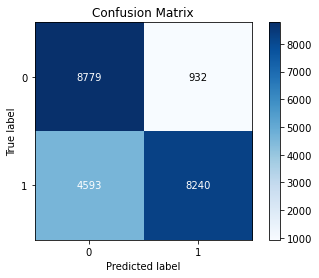

Accuracy: 0.75492 
Precision: 0.89839 
Recall: 0.64209 
F-measure: 0.74892 


In [69]:
y_prediction = NN(X_df_rfe, y_df, 13).predict(X_df_test_rfe) >0.5
plotConfusionMatrix(y_prediction, y_df_test, 1)

Epoch 1/40
1260/1260 [==============================] - 3s 2ms/step - loss: 0.1071 - accuracy: 0.0088 - precision_19: 0.9702
Epoch 2/40
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0671 - accuracy: 0.0117 - precision_19: 0.9785
Epoch 3/40
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0556 - accuracy: 0.0276 - precision_19: 0.9813
Epoch 4/40
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0509 - accuracy: 0.0291 - precision_19: 0.9818
Epoch 5/40
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0475 - accuracy: 0.0271 - precision_19: 0.9835
Epoch 6/40
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0438 - accuracy: 0.0867 - precision_19: 0.9846
Epoch 7/40
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0417 - accuracy: 0.0669 - precision_19: 0.9850
Epoch 8/40
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0401 - accuracy: 0.0410 - precision_19: 0.9848


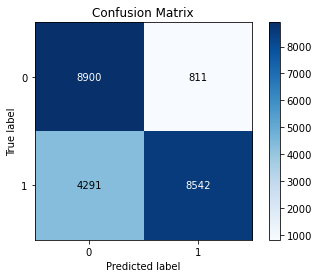

Accuracy: 0.77369 
Precision: 0.91329 
Recall: 0.66563 
F-measure: 0.77004 


In [70]:
y_prediction = NN(X_df_rfe_ss, y_df, 13).predict(X_df_test_rfe_ss) >0.5
plotConfusionMatrix(y_prediction, y_df_test, 1)

# Reduced DF, oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

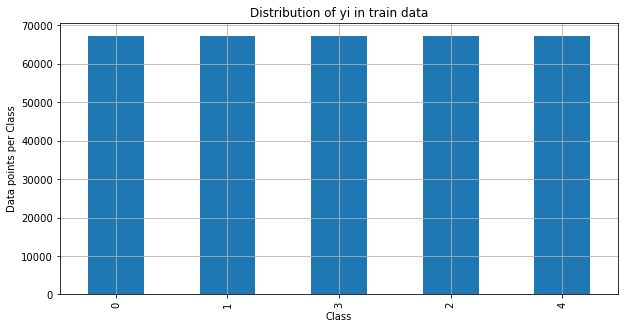

In [71]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareMulticlass()

x_df, y_df = getXandY(reducedDf)
x_df_test, y_df_test = getXandY(reducedDf_test)


oversampled_df = overSampledDF(x_df, y_df)
oversampled_df_test = overSampledDF(x_df_test, y_df_test)

plotDf(oversampled_df['label'])

In [72]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(oversampled_df)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(oversampled_df_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)

In [73]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

## No feature selection

#### K-fold cross validation on dos

In [74]:
y_probe=y_probe.replace(2, 1)
y_probe_test=y_probe_test.replace(2, 1)
y_r2l=y_r2l.replace(3, 1)
y_r2l_test=y_r2l_test.replace(3, 1)
y_u2r=y_u2r.replace(4, 1)
y_u2r_test=y_u2r_test.replace(4, 1)

In [75]:
KfoldCVNN(modelNN(X_dos, y_dos, 38), pd.DataFrame(X_dos), y_dos, 10, 1)

3789/3789 [==============================] - 3s 702us/step
>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
3789/3789 [==============================] - 3s 691us/step
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
3789/3789 [==============================] - 3s 696us/step
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
3789/3789 [==============================] - 3s 695us/step
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
3789/3789 [==============================] - 3s 691us/step
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
3789/3789 [==============================] - 3s 693us/step
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
3789/3789 [==============================] - 3s 716us/step
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
3789/3789 [==============================] - 3s 695us/step
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
3789/3789 [==============================] - 3s 690us/step
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
3789/3789 [==============================] - 

{'Mean Training Accuracy': 0.9863979936589218,
 'Mean Training Precision': 0.9871305708698321,
 'Mean Training Recall': 0.9859414025910425,
 'Mean Training F1 Score': 0.9864980435037616,
 'Mean Validation Accuracy': 0.9869251153960485,
 'Mean Validation Precision': 0.9839325169225772,
 'Mean Validation Recall': 0.9861459397610627,
 'Mean Validation F1 Score': 0.9849687089235039}

#### K-fold cross validation on dos Standard Scaler

In [76]:
KfoldCVNN(modelNN(X_dos_ss, y_dos, 38), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

3789/3789 [==============================] - 3s 686us/step
>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
3789/3789 [==============================] - 3s 689us/step
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
3789/3789 [==============================] - 3s 691us/step
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
3789/3789 [==============================] - 3s 793us/step
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
3789/3789 [==============================] - 3s 702us/step
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
3789/3789 [==============================] - 3s 713us/step
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
3789/3789 [==============================] - 3s 694us/step
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
3789/3789 [==============================] - 3s 707us/step
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
3789/3789 [==============================] - 3s 707us/step
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
3789/3789 [==============================] - 

{'Mean Training Accuracy': 0.9974475605012445,
 'Mean Training Precision': 0.9958648381658957,
 'Mean Training Recall': 0.9990381415665606,
 'Mean Training F1 Score': 0.9974487920529003,
 'Mean Validation Accuracy': 0.9972380411184331,
 'Mean Validation Precision': 0.9947557294888607,
 'Mean Validation Recall': 0.998815171552424,
 'Mean Validation F1 Score': 0.9967794921483751}

#### Stratified cross validation on dos

In [77]:
stratifiedCVNN(modelNN(X_dos, y_dos, 38), pd.DataFrame(X_dos), y_dos, 10, 1)

3789/3789 [==============================] - 3s 727us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 707us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 704us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 702us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 701us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 709us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 707us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 705us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 695us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3

{'Mean Training Accuracy': 0.9832432998024286,
 'Mean Training Precision': 0.9832163086659536,
 'Mean Training Recall': 0.9833571304236306,
 'Mean Training F1 Score': 0.9832599729659405,
 'Mean Validation Accuracy': 0.9830349026837257,
 'Mean Validation Precision': 0.982893503420977,
 'Mean Validation Recall': 0.9832800188034041,
 'Mean Validation F1 Score': 0.9830575120287612}

#### Stratified cross validation on dos Standard Scaler

In [78]:
stratifiedCVNN(modelNN(X_dos_ss, y_dos, 38), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

3789/3789 [==============================] - 3s 709us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 716us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 771us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 710us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 709us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 710us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 706us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 755us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 712us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3

{'Mean Training Accuracy': 0.997259468487109,
 'Mean Training Precision': 0.9957318557611954,
 'Mean Training Recall': 0.9988005017507706,
 'Mean Training F1 Score': 0.9972636880531306,
 'Mean Validation Accuracy': 0.9972603062179125,
 'Mean Validation Precision': 0.9958551826917542,
 'Mean Validation Recall': 0.9986784346695259,
 'Mean Validation F1 Score': 0.9972643254837295}

#### Predict on dos

Epoch 1/40
1347/1347 [==============================] - 3s 2ms/step - loss: 27.3201 - accuracy: 0.5393 - precision_20: 0.9650
Epoch 2/40
1347/1347 [==============================] - 2s 2ms/step - loss: 29.7232 - accuracy: 0.6306 - precision_20: 0.9751
Epoch 3/40
1347/1347 [==============================] - 2s 2ms/step - loss: 45.1498 - accuracy: 0.4849 - precision_20: 0.9777
Epoch 4/40
1347/1347 [==============================] - 2s 2ms/step - loss: 99.9156 - accuracy: 0.6594 - precision_20: 0.9767
Epoch 5/40
1347/1347 [==============================] - 2s 2ms/step - loss: 100.6001 - accuracy: 0.8530 - precision_20: 0.9769
Epoch 6/40
1347/1347 [==============================] - 2s 2ms/step - loss: 46.0236 - accuracy: 0.8000 - precision_20: 0.9849
Epoch 7/40
1347/1347 [==============================] - 2s 2ms/step - loss: 106.4204 - accuracy: 0.6992 - precision_20: 0.9815
Epoch 8/40
1347/1347 [==============================] - 2s 2ms/step - loss: 93.2733 - accuracy: 0.8361 - precision_2

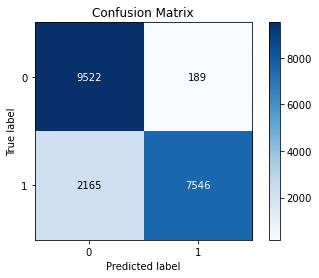

Accuracy: 0.87880 
Precision: 0.97557 
Recall: 0.77706 
F-measure: 0.86507 


In [79]:
y_dos_prediction = NN(X_dos, y_dos, 38).predict(X_dos_test) >0.5
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

Epoch 1/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0243 - accuracy: 0.0018 - precision_21: 0.9936
Epoch 2/40
1347/1347 [==============================] - 2s 2ms/step - loss: 0.0096 - accuracy: 0.0135 - precision_21: 0.9952
Epoch 3/40
1347/1347 [==============================] - 2s 2ms/step - loss: 0.0082 - accuracy: 0.1187 - precision_21: 0.9953
Epoch 4/40
1347/1347 [==============================] - 2s 2ms/step - loss: 0.0079 - accuracy: 0.2103 - precision_21: 0.9955
Epoch 5/40
1347/1347 [==============================] - 2s 2ms/step - loss: 0.0071 - accuracy: 0.2556 - precision_21: 0.9957
Epoch 6/40
1347/1347 [==============================] - 2s 2ms/step - loss: 0.0073 - accuracy: 0.3528 - precision_21: 0.9958
Epoch 7/40
1347/1347 [==============================] - 2s 2ms/step - loss: 0.0066 - accuracy: 0.3673 - precision_21: 0.9959
Epoch 8/40
1347/1347 [==============================] - 2s 2ms/step - loss: 0.0067 - accuracy: 0.3797 - precision_21: 0.9958


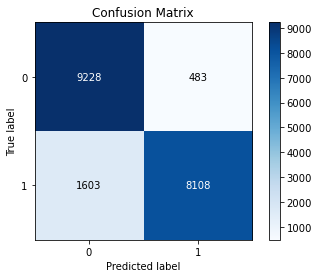

Accuracy: 0.89260 
Precision: 0.94378 
Recall: 0.83493 
F-measure: 0.88602 


In [80]:
y_dos_prediction = NN(X_dos_ss, y_dos, 38).predict(X_dos_test_ss) >0.5
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [81]:
KfoldCVNN(modelNN(X_probe, y_probe, 38), pd.DataFrame(X_probe), y_probe, 10, 1)

3789/3789 [==============================] - 3s 699us/step
>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
3789/3789 [==============================] - 3s 688us/step
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
3789/3789 [==============================] - 3s 703us/step
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
3789/3789 [==============================] - 3s 702us/step
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
3789/3789 [==============================] - 3s 706us/step
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
3789/3789 [==============================] - 3s 704us/step
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
3789/3789 [==============================] - 3s 692us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 711us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 690us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s

{'Mean Training Accuracy': 0.9647195808984984,
 'Mean Training Precision': 0.960007522698884,
 'Mean Training Recall': 0.9702805945631434,
 'Mean Training F1 Score': 0.96487514499347,
 'Mean Validation Accuracy': 0.9630476002237085,
 'Mean Validation Precision': 0.8911311392763241,
 'Mean Validation Recall': 0.9698922233846161,
 'Mean Validation F1 Score': 0.9257111435694991}

#### K-fold cross validation on probe Standard Scaling

In [82]:
KfoldCVNN(modelNN(X_probe_ss, y_probe, 38), pd.DataFrame(X_probe_ss), y_probe, 10, 1)

3789/3789 [==============================] - 4s 1ms/step
>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 5s 1ms/step
>Train: 

{'Mean Training Accuracy': 0.9929770747760169,
 'Mean Training Precision': 0.9946263991693727,
 'Mean Training Recall': 0.9914871065705612,
 'Mean Training F1 Score': 0.9930526345139519,
 'Mean Validation Accuracy': 0.9920556152626092,
 'Mean Validation Precision': 0.9760561075348786,
 'Mean Validation Recall': 0.9898484040871167,
 'Mean Validation F1 Score': 0.9827903747649318}

#### Stratified cross validation on probe

In [83]:
stratifiedCVNN(modelNN(X_probe, y_probe, 38), pd.DataFrame(X_probe), y_probe, 10, 1)

3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 819us/step
>Trai

{'Mean Training Accuracy': 0.970747568638769,
 'Mean Training Precision': 0.966516307767755,
 'Mean Training Recall': 0.9760282166392148,
 'Mean Training F1 Score': 0.9710607442152084,
 'Mean Validation Accuracy': 0.9708732785575908,
 'Mean Validation Precision': 0.9663488172178963,
 'Mean Validation Recall': 0.9764635687352838,
 'Mean Validation F1 Score': 0.9711996232158032}

#### Stratified cross validation on probe Standard Scaling

In [84]:
stratifiedCVNN(modelNN(X_probe_ss, y_probe, 38), pd.DataFrame(X_probe_ss), y_probe, 10, 1)

3789/3789 [==============================] - 3s 723us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 739us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 732us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 732us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 737us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 738us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 739us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 815us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 751us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3

{'Mean Training Accuracy': 0.9933433611559668,
 'Mean Training Precision': 0.9935250344994391,
 'Mean Training Recall': 0.9931626928694604,
 'Mean Training F1 Score': 0.9933406319266037,
 'Mean Validation Accuracy': 0.9929465963080188,
 'Mean Validation Precision': 0.9931126011299533,
 'Mean Validation Recall': 0.9927832191083862,
 'Mean Validation F1 Score': 0.9929432584793746}

#### Predict on probe

Epoch 1/40
1347/1347 [==============================] - 3s 2ms/step - loss: 6556.4712 - accuracy: 0.5062 - precision_22: 0.8106
Epoch 2/40
1347/1347 [==============================] - 3s 2ms/step - loss: 14828.6885 - accuracy: 0.7611 - precision_22: 0.8876
Epoch 3/40
1347/1347 [==============================] - 3s 2ms/step - loss: 23883.6133 - accuracy: 0.8817 - precision_22: 0.9191
Epoch 4/40
1347/1347 [==============================] - 3s 2ms/step - loss: 27650.5898 - accuracy: 0.8776 - precision_22: 0.9440
Epoch 5/40
1347/1347 [==============================] - 3s 2ms/step - loss: 12234.0283 - accuracy: 0.8704 - precision_22: 0.9607
Epoch 6/40
1347/1347 [==============================] - 3s 2ms/step - loss: 17980.5391 - accuracy: 0.8653 - precision_22: 0.9593
Epoch 7/40
1347/1347 [==============================] - 3s 2ms/step - loss: 11910.3457 - accuracy: 0.9056 - precision_22: 0.9594
Epoch 8/40
1347/1347 [==============================] - 3s 2ms/step - loss: 14457.7061 - accuracy:

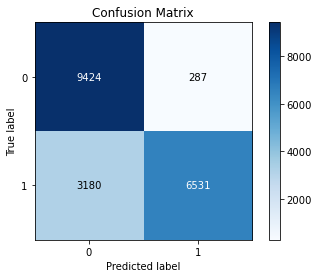

Accuracy: 0.82149 
Precision: 0.95791 
Recall: 0.67254 
F-measure: 0.79025 


In [85]:
y_probe_rfe_prediction = NN(X_probe, y_probe, 38).predict(X_probe_test) >0.5
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 1)

Epoch 1/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0482 - accuracy: 0.0140 - precision_23: 0.9818
Epoch 2/40
1347/1347 [==============================] - 2s 2ms/step - loss: 0.0251 - accuracy: 0.0895 - precision_23: 0.9901
Epoch 3/40
1347/1347 [==============================] - 2s 2ms/step - loss: 0.0201 - accuracy: 0.1222 - precision_23: 0.9917
Epoch 4/40
1347/1347 [==============================] - 2s 2ms/step - loss: 0.0178 - accuracy: 0.1593 - precision_23: 0.9929
Epoch 5/40
1347/1347 [==============================] - 2s 2ms/step - loss: 0.0165 - accuracy: 0.1633 - precision_23: 0.9934
Epoch 6/40
1347/1347 [==============================] - 2s 2ms/step - loss: 0.0151 - accuracy: 0.1825 - precision_23: 0.9936
Epoch 7/40
1347/1347 [==============================] - 2s 2ms/step - loss: 0.0143 - accuracy: 0.2064 - precision_23: 0.9941
Epoch 8/40
1347/1347 [==============================] - 2s 2ms/step - loss: 0.0134 - accuracy: 0.2315 - precision_23: 0.9943


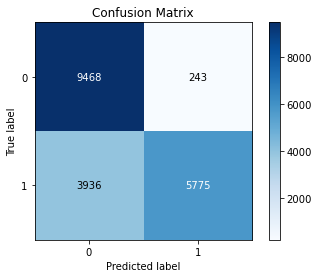

Accuracy: 0.78483 
Precision: 0.95962 
Recall: 0.59469 
F-measure: 0.73431 


In [86]:
y_probe_rfe_prediction = NN(X_probe_ss, y_probe, 38).predict(X_probe_test_ss) >0.5
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 1)

#### K-fold cross validation on r2l

In [87]:
KfoldCVNN(modelNN(X_r2l, y_r2l, 38), pd.DataFrame(X_r2l), y_r2l, 10, 1)

3789/3789 [==============================] - 3s 715us/step
>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
3789/3789 [==============================] - 3s 713us/step
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
3789/3789 [==============================] - 3s 711us/step
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
3789/3789 [==============================] - 3s 763us/step
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
3789/3789 [==============================] - 3s 713us/step
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
3789/3789 [==============================] - 3s 712us/step
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
3789/3789 [==============================] - 3s 714us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 708us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 713us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 656u

{'Mean Training Accuracy': 0.9447645676626216,
 'Mean Training Precision': 0.946834386540297,
 'Mean Training Recall': 0.9432784955430782,
 'Mean Training F1 Score': 0.94236812272792,
 'Mean Validation Accuracy': 0.9354417897609671,
 'Mean Validation Precision': 0.6109684423896993,
 'Mean Validation Recall': 0.9393222346077662,
 'Mean Validation F1 Score': 0.6561847720908978}

#### K-fold cross validation on r2l Standard Scaling

In [88]:
KfoldCVNN(modelNN(X_r2l_ss, y_r2l, 38), pd.DataFrame(X_r2l_ss), y_r2l, 10, 1)

3789/3789 [==============================] - 3s 678us/step
>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
3789/3789 [==============================] - 3s 676us/step
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
3789/3789 [==============================] - 3s 666us/step
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
3789/3789 [==============================] - 3s 664us/step
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
3789/3789 [==============================] - 3s 667us/step
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
3789/3789 [==============================] - 3s 665us/step
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
3789/3789 [==============================] - 3s 663us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 659us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 670us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 674u

{'Mean Training Accuracy': 0.9945354323968735,
 'Mean Training Precision': 0.9929223043253309,
 'Mean Training Recall': 0.9963814219025077,
 'Mean Training F1 Score': 0.9946392625854731,
 'Mean Validation Accuracy': 0.9936817034652806,
 'Mean Validation Precision': 0.7986152415322925,
 'Mean Validation Recall': 0.9949842168436988,
 'Mean Validation F1 Score': 0.8709012860698543}

#### Stratified cross validation on r2l

In [89]:
stratifiedCVNN(modelNN(X_r2l, y_r2l, 38), pd.DataFrame(X_r2l), y_r2l, 10, 1)

3789/3789 [==============================] - 3s 667us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 669us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 667us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 662us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 665us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 698us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 676us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 672us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 664us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3

{'Mean Training Accuracy': 0.9261895987190945,
 'Mean Training Precision': 0.9201112530413844,
 'Mean Training Recall': 0.9398085901230372,
 'Mean Training F1 Score': 0.9258856855048891,
 'Mean Validation Accuracy': 0.9266371118772929,
 'Mean Validation Precision': 0.9205712768134365,
 'Mean Validation Recall': 0.9403239023060849,
 'Mean Validation F1 Score': 0.9264472417662095}

#### Stratified cross validation on r2l Standard Scaling

In [90]:
stratifiedCVNN(modelNN(X_r2l_ss, y_r2l, 38), pd.DataFrame(X_r2l_ss), y_r2l, 10, 1)

3789/3789 [==============================] - 3s 828us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 749us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 680us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 785us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 845us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 4s 917us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 793u

{'Mean Training Accuracy': 0.9951285821001606,
 'Mean Training Precision': 0.9925245613969205,
 'Mean Training Recall': 0.9977775433059131,
 'Mean Training F1 Score': 0.9951421068956178,
 'Mean Validation Accuracy': 0.9950552047014295,
 'Mean Validation Precision': 0.99229961649308,
 'Mean Validation Recall': 0.9978617345655207,
 'Mean Validation F1 Score': 0.995069852299401}

#### Predict on r2l

Epoch 1/40
1347/1347 [==============================] - 5s 3ms/step - loss: 149.3152 - accuracy: 0.2038 - precision_24: 0.8287
Epoch 2/40
1347/1347 [==============================] - 4s 3ms/step - loss: 28.0870 - accuracy: 0.1531 - precision_24: 0.9159
Epoch 3/40
1347/1347 [==============================] - 3s 2ms/step - loss: 5.1789 - accuracy: 0.0857 - precision_24: 0.9336
Epoch 4/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.1772 - accuracy: 0.0614 - precision_24: 0.9385
Epoch 5/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0820 - accuracy: 0.0662 - precision_24: 0.9662
Epoch 6/40
1347/1347 [==============================] - 4s 3ms/step - loss: 1.1165 - accuracy: 0.0767 - precision_24: 0.9571
Epoch 7/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0927 - accuracy: 0.0703 - precision_24: 0.9442
Epoch 8/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0984 - accuracy: 0.0692 - precision_24: 0.94

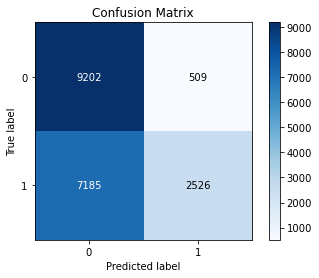

Accuracy: 0.60385 
Precision: 0.83229 
Recall: 0.26012 
F-measure: 0.39636 


In [91]:
y_r2l_rfe_prediction = NN(X_r2l, y_r2l, 38).predict(X_r2l_test)>0.5
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 1)

Epoch 1/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0559 - accuracy: 5.9397e-04 - precision_25: 0.9803
Epoch 2/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0258 - accuracy: 0.0163 - precision_25: 0.9899
Epoch 3/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0203 - accuracy: 0.0392 - precision_25: 0.9918
Epoch 4/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0198 - accuracy: 0.0498 - precision_25: 0.9928
Epoch 5/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0167 - accuracy: 0.0538 - precision_25: 0.9930
Epoch 6/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0148 - accuracy: 0.0554 - precision_25: 0.9935
Epoch 7/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0153 - accuracy: 0.0627 - precision_25: 0.9937
Epoch 8/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0136 - accuracy: 0.0612 - precision_25: 0.9

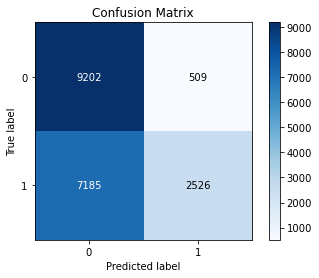

Accuracy: 0.60385 
Precision: 0.83229 
Recall: 0.26012 
F-measure: 0.39636 


In [92]:
y_probe_rfy_r2l_rfe_predictione_prediction = NN(X_r2l_ss, y_r2l, 38).predict(X_r2l_test_ss)>0.5
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 1)

#### K-fold cross validation on u2r

In [93]:
KfoldCVNN(modelNN(X_u2r, y_u2r, 38), pd.DataFrame(X_u2r), y_u2r, 10, 1)

3789/3789 [==============================] - 4s 1ms/step
>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=67343, 1=53

{'Mean Training Accuracy': 0.9776566662622113,
 'Mean Training Precision': 0.9608943660677379,
 'Mean Training Recall': 0.9976448395304995,
 'Mean Training F1 Score': 0.9786289447889654,
 'Mean Validation Accuracy': 0.9705174415954728,
 'Mean Validation Precision': 0.5089255774566503,
 'Mean Validation Recall': 0.9991823815767479,
 'Mean Validation F1 Score': 0.5170479509668462}

#### K-fold cross validation on u2r Standard Scaling

In [94]:
KfoldCVNN(modelNN(X_u2r_ss, y_u2r, 38), pd.DataFrame(X_u2r_ss), y_u2r, 10, 1)

3789/3789 [==============================] - 5s 1ms/step
>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
3789/3789 [==============================] - 4s 926us/step
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
3789/3789 [==============================] - 3s 759us/step
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
3789/3789 [==============================] - 3s 726us/step
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
3789/3789 [==============================] - 3s 778us/step
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
3789/3789 [==============================] - 3s 725us/step
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
3789/3789 [==============================] - 3s 777us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 4s 823us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 4s 933us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 4s 1ms/step
>Trai

{'Mean Training Accuracy': 0.9981496043242408,
 'Mean Training Precision': 0.9969985981351158,
 'Mean Training Recall': 0.9992775679500818,
 'Mean Training F1 Score': 0.9981359126054489,
 'Mean Validation Accuracy': 0.9978617549725278,
 'Mean Validation Precision': 0.5980766095606521,
 'Mean Validation Recall': 0.982240493508099,
 'Mean Validation F1 Score': 0.6599880328656266}

#### Stratified cross validation on u2r

In [95]:
stratifiedCVNN(modelNN(X_u2r, y_u2r, 38), pd.DataFrame(X_u2r), y_u2r, 10, 1)

3789/3789 [==============================] - 4s 930us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 5s 1ms/step
>Trai

{'Mean Training Accuracy': 0.9734691306044629,
 'Mean Training Precision': 0.9678707913592518,
 'Mean Training Recall': 0.9806909538742307,
 'Mean Training F1 Score': 0.9731676903032263,
 'Mean Validation Accuracy': 0.9729001517812863,
 'Mean Validation Precision': 0.9675563274141352,
 'Mean Validation Recall': 0.9798636973692652,
 'Mean Validation F1 Score': 0.9725349073394334}

#### Stratified cross validation on u2r Standard Scaling

In [96]:
stratifiedCVNN(modelNN(X_u2r_ss, y_u2r, 38), pd.DataFrame(X_u2r_ss), y_u2r, 10, 1)

3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 4s 1ms/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 5s 1ms/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 4s 1ms/step
>Train:

{'Mean Training Accuracy': 0.9983855454945889,
 'Mean Training Precision': 0.9969716834029441,
 'Mean Training Recall': 0.9998086087379935,
 'Mean Training F1 Score': 0.9983879606876638,
 'Mean Validation Accuracy': 0.9983591466775072,
 'Mean Validation Precision': 0.9968919576445552,
 'Mean Validation Recall': 0.999836654246454,
 'Mean Validation F1 Score': 0.9983618551131686}

#### Predict on u2r

Epoch 1/40
1347/1347 [==============================] - 5s 3ms/step - loss: 4.1835 - accuracy: 0.3490 - precision_26: 0.9259
Epoch 2/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.8928 - accuracy: 0.4597 - precision_26: 0.9593
Epoch 3/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0459 - accuracy: 0.5510 - precision_26: 0.9818
Epoch 4/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0752 - accuracy: 0.5401 - precision_26: 0.9739
Epoch 5/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0809 - accuracy: 0.4797 - precision_26: 0.9694
Epoch 6/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0557 - accuracy: 0.4868 - precision_26: 0.9757
Epoch 7/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0545 - accuracy: 0.5079 - precision_26: 0.9792
Epoch 8/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0711 - accuracy: 0.4362 - precision_26: 0.9681


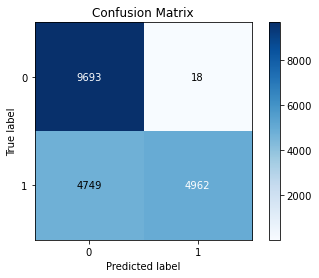

Accuracy: 0.75456 
Precision: 0.99639 
Recall: 0.51097 
F-measure: 0.67552 


In [97]:
y_u2r_rfe_prediction = NN(X_u2r, y_u2r, 38).predict(X_u2r_test)>0.5
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 1)

Epoch 1/40
1347/1347 [==============================] - 5s 3ms/step - loss: 0.0354 - accuracy: 0.0107 - precision_27: 0.9888
Epoch 2/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0118 - accuracy: 0.0368 - precision_27: 0.9953
Epoch 3/40
1347/1347 [==============================] - 3s 3ms/step - loss: 0.0082 - accuracy: 0.0592 - precision_27: 0.9967
Epoch 4/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0071 - accuracy: 0.0666 - precision_27: 0.9971
Epoch 5/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0061 - accuracy: 0.0995 - precision_27: 0.9976
Epoch 6/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0055 - accuracy: 0.1836 - precision_27: 0.9979
Epoch 7/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0060 - accuracy: 0.2713 - precision_27: 0.9976
Epoch 8/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0061 - accuracy: 0.3799 - precision_27: 0.9975


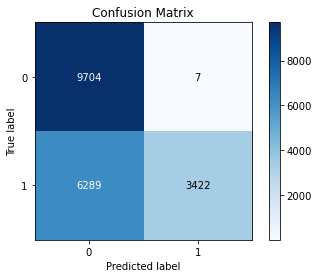

Accuracy: 0.67583 
Precision: 0.99796 
Recall: 0.35238 
F-measure: 0.52085 


In [98]:
y_u2r_rfe_prediction = NN(X_u2r_ss, y_u2r, 38).predict(X_u2r_test_ss)>0.5
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 1)

## Feature selection

In [99]:
X_dos_rfe, rfecolname_dos = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_dos, y_dos, 13)
X_probe_rfe, rfecolname_probe = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_probe, y_probe, 13)
X_r2l_rfe, rfecolname_r2l = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_r2l, y_r2l, 13)
X_u2r_rfe, rfecolname_u2r = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_u2r, y_u2r, 13)

X_dos_test_rfe=X_dos_test.values[:,rfecolname_dos]
X_probe_test_rfe=X_probe_test.values[:,rfecolname_probe]
X_r2l_test_rfe=X_r2l_test.values[:,rfecolname_r2l]
X_u2r_test_rfe=X_u2r_test.values[:,rfecolname_u2r]

In [100]:
X_dos_rfe_ss, rfecolname_dosSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_dos_ss, y_dos, 13)
X_probe_rfe_ss, rfecolname_probeSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_probe_ss, y_probe, 13)
X_r2l_rfe_ss, rfecolname_r2lSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_r2l_ss, y_r2l, 13)
X_u2r_rfe_ss, rfecolname_u2rSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_u2r_ss, y_u2r, 13)

X_dos_test_rfe_ss=X_dos_test_ss[:,rfecolname_dosSS]
X_probe_test_rfe_ss=X_probe_test_ss[:,rfecolname_probeSS]
X_r2l_test_rfe_ss=X_r2l_test_ss[:,rfecolname_r2lSS]
X_u2r_test_rfe_ss=X_u2r_test_ss[:,rfecolname_u2rSS]

#### K-fold cross validation on dos

In [101]:
KfoldCVNN(modelNN(X_dos_rfe, y_dos, 13), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

3789/3789 [==============================] - 3s 795us/step
>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
3789/3789 [==============================] - 3s 723us/step
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
3789/3789 [==============================] - 3s 707us/step
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
3789/3789 [==============================] - 3s 709us/step
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
3789/3789 [==============================] - 3s 707us/step
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
3789/3789 [==============================] - 3s 703us/step
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
3789/3789 [==============================] - 3s 710us/step
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
3789/3789 [==============================] - 3s 704us/step
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
3789/3789 [==============================] - 3s 712us/step
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
3789/3789 [==============================] - 

{'Mean Training Accuracy': 0.9861859693184523,
 'Mean Training Precision': 0.9873560290721712,
 'Mean Training Recall': 0.9850640398299848,
 'Mean Training F1 Score': 0.986147566482692,
 'Mean Validation Accuracy': 0.9850244413890563,
 'Mean Validation Precision': 0.9830724396993263,
 'Mean Validation Recall': 0.9854305772125352,
 'Mean Validation F1 Score': 0.984135207970043}

#### K-fold cross validation on dos Standard Scaler

In [102]:
KfoldCVNN(modelNN(X_dos_rfe_ss, y_dos, 13), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

3789/3789 [==============================] - 3s 710us/step
>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
3789/3789 [==============================] - 3s 726us/step
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
3789/3789 [==============================] - 3s 699us/step
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
3789/3789 [==============================] - 3s 706us/step
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
3789/3789 [==============================] - 3s 738us/step
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
3789/3789 [==============================] - 3s 714us/step
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
3789/3789 [==============================] - 3s 697us/step
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
3789/3789 [==============================] - 3s 709us/step
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
3789/3789 [==============================] - 3s 696us/step
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
3789/3789 [==============================] - 

{'Mean Training Accuracy': 0.9956598633908154,
 'Mean Training Precision': 0.9937663546011211,
 'Mean Training Recall': 0.9975648712298663,
 'Mean Training F1 Score': 0.9956615013127518,
 'Mean Validation Accuracy': 0.9956343166919304,
 'Mean Validation Precision': 0.9924745923961895,
 'Mean Validation Recall': 0.9973790957204276,
 'Mean Validation F1 Score': 0.9949180549942716}

#### Stratified cross validation on dos

In [103]:
stratifiedCVNN(modelNN(X_dos_rfe, y_dos, 13), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

3789/3789 [==============================] - 3s 756us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 718us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 716us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 709us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 724us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 716us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 721us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 723us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 729us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3

{'Mean Training Accuracy': 0.9831756615018789,
 'Mean Training Precision': 0.9847156685845937,
 'Mean Training Recall': 0.9819497145714658,
 'Mean Training F1 Score': 0.9831508901114091,
 'Mean Validation Accuracy': 0.9831461769133458,
 'Mean Validation Precision': 0.9849541833196097,
 'Mean Validation Recall': 0.9816617111494617,
 'Mean Validation F1 Score': 0.983121410212499}

#### Stratified cross validation on dos Standard Scaler

In [104]:
stratifiedCVNN(modelNN(X_dos_rfe_ss, y_dos, 13), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

3789/3789 [==============================] - 3s 721us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 723us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 721us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 761us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 720us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 710us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 719us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 713us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 720us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3

{'Mean Training Accuracy': 0.9958471304313499,
 'Mean Training Precision': 0.993971067870843,
 'Mean Training Recall': 0.9977462000803164,
 'Mean Training F1 Score': 0.9958549381921975,
 'Mean Validation Accuracy': 0.9957011208106316,
 'Mean Validation Precision': 0.9937881166542993,
 'Mean Validation Recall': 0.997638946859437,
 'Mean Validation F1 Score': 0.9957095880959057}

#### Predict on dos

Epoch 1/40
1347/1347 [==============================] - 4s 2ms/step - loss: 37.7551 - accuracy: 0.5516 - precision_28: 0.9543
Epoch 2/40
1347/1347 [==============================] - 3s 2ms/step - loss: 18.1809 - accuracy: 0.5453 - precision_28: 0.9735
Epoch 3/40
1347/1347 [==============================] - 3s 2ms/step - loss: 25.3963 - accuracy: 0.4999 - precision_28: 0.9825
Epoch 4/40
1347/1347 [==============================] - 3s 2ms/step - loss: 21.0197 - accuracy: 0.4888 - precision_28: 0.9812
Epoch 5/40
1347/1347 [==============================] - 3s 2ms/step - loss: 9.7739 - accuracy: 0.5258 - precision_28: 0.9813
Epoch 6/40
1347/1347 [==============================] - 3s 2ms/step - loss: 12.8576 - accuracy: 0.5531 - precision_28: 0.9837
Epoch 7/40
1347/1347 [==============================] - 3s 2ms/step - loss: 6.4939 - accuracy: 0.5328 - precision_28: 0.9917
Epoch 8/40
1347/1347 [==============================] - 3s 2ms/step - loss: 6.5595 - accuracy: 0.4669 - precision_28: 0.

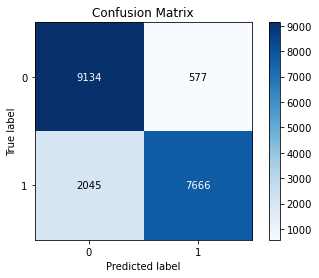

Accuracy: 0.86500 
Precision: 0.93000 
Recall: 0.78941 
F-measure: 0.85396 


In [105]:
y_dos_rfe_prediction = NN(X_dos_rfe, y_dos, 13).predict(X_dos_test_rfe) >0.5
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

Epoch 1/40
1347/1347 [==============================] - 4s 2ms/step - loss: 0.0392 - accuracy: 0.0086 - precision_29: 0.9905
Epoch 2/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0146 - accuracy: 0.0128 - precision_29: 0.9936
Epoch 3/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0130 - accuracy: 0.0209 - precision_29: 0.9938
Epoch 4/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0128 - accuracy: 0.0950 - precision_29: 0.9938
Epoch 5/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0125 - accuracy: 0.1235 - precision_29: 0.9938
Epoch 6/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0123 - accuracy: 0.0855 - precision_29: 0.9938
Epoch 7/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0120 - accuracy: 0.2072 - precision_29: 0.9939
Epoch 8/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0118 - accuracy: 0.2729 - precision_29: 0.9938


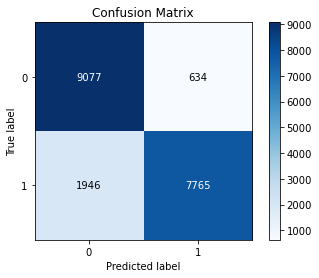

Accuracy: 0.86716 
Precision: 0.92451 
Recall: 0.79961 
F-measure: 0.85754 


In [106]:
y_dos_rfe_prediction = NN(X_dos_rfe_ss, y_dos, 13).predict(X_dos_test_rfe_ss)  >0.5
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [107]:
KfoldCVNN(modelNN(X_probe_rfe, y_probe, 13), pd.DataFrame(X_probe_rfe), y_probe, 10, 1)

3789/3789 [==============================] - 3s 734us/step
>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
3789/3789 [==============================] - 3s 732us/step
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
3789/3789 [==============================] - 3s 723us/step
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
3789/3789 [==============================] - 3s 729us/step
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
3789/3789 [==============================] - 3s 712us/step
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
3789/3789 [==============================] - 3s 729us/step
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
3789/3789 [==============================] - 3s 692us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 711us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 662us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s

{'Mean Training Accuracy': 0.9593325416491417,
 'Mean Training Precision': 0.9513473193051339,
 'Mean Training Recall': 0.9708532742083126,
 'Mean Training F1 Score': 0.9605838683843752,
 'Mean Validation Accuracy': 0.9465206257544221,
 'Mean Validation Precision': 0.8462072292149145,
 'Mean Validation Recall': 0.9702026653784461,
 'Mean Validation F1 Score': 0.8918094243020669}

#### K-fold cross validation on probe Standard Scaler

In [108]:
KfoldCVNN(modelNN(X_probe_rfe_ss, y_probe, 13), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 1)

3789/3789 [==============================] - 3s 780us/step
>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
3789/3789 [==============================] - 3s 756us/step
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
3789/3789 [==============================] - 3s 711us/step
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
3789/3789 [==============================] - 3s 721us/step
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
3789/3789 [==============================] - 3s 725us/step
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
3789/3789 [==============================] - 3s 753us/step
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
3789/3789 [==============================] - 3s 730us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 716us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 710us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s

{'Mean Training Accuracy': 0.991557311651597,
 'Mean Training Precision': 0.9941707709757294,
 'Mean Training Recall': 0.9890837306004707,
 'Mean Training F1 Score': 0.9916086680275169,
 'Mean Validation Accuracy': 0.9908230634787915,
 'Mean Validation Precision': 0.9758010277961582,
 'Mean Validation Recall': 0.9887054985269481,
 'Mean Validation F1 Score': 0.9819902728941873}

#### Stratified cross validation on probe

In [109]:
stratifiedCVNN(modelNN(X_probe_rfe, y_probe, 13), pd.DataFrame(X_probe_rfe), y_probe, 10, 1)

3789/3789 [==============================] - 3s 743us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 720us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 725us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 745us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 721us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 723us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 725us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 715us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 707us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3

{'Mean Training Accuracy': 0.9566332484785113,
 'Mean Training Precision': 0.9542685008850527,
 'Mean Training Recall': 0.9615534516230134,
 'Mean Training F1 Score': 0.9571113952291863,
 'Mean Validation Accuracy': 0.9565214674279936,
 'Mean Validation Precision': 0.9536731478739652,
 'Mean Validation Recall': 0.9620889616212557,
 'Mean Validation F1 Score': 0.9570830029299919}

#### Stratified cross validation on probe Standard Scaler

In [110]:
stratifiedCVNN(modelNN(X_probe_rfe_ss, y_probe, 13), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 1)

3789/3789 [==============================] - 3s 697us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 688us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 734us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 765us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 743us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 706us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 707us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 719us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 700us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3

{'Mean Training Accuracy': 0.9917949029120653,
 'Mean Training Precision': 0.9926550618966822,
 'Mean Training Recall': 0.9909352921594495,
 'Mean Training F1 Score': 0.991789251064678,
 'Mean Validation Accuracy': 0.9915581833151809,
 'Mean Validation Precision': 0.9924575097941428,
 'Mean Validation Recall': 0.9906597485662074,
 'Mean Validation F1 Score': 0.9915521733088853}

#### Predict on probe

Epoch 1/40
1347/1347 [==============================] - 4s 2ms/step - loss: 6898.4053 - accuracy: 0.5041 - precision_30: 0.7973
Epoch 2/40
1347/1347 [==============================] - 3s 2ms/step - loss: 12957.2295 - accuracy: 0.6203 - precision_30: 0.8687
Epoch 3/40
1347/1347 [==============================] - 3s 2ms/step - loss: 9041.6904 - accuracy: 0.5902 - precision_30: 0.9275
Epoch 4/40
1347/1347 [==============================] - 3s 2ms/step - loss: 10002.8398 - accuracy: 0.6961 - precision_30: 0.9380
Epoch 5/40
1347/1347 [==============================] - 3s 2ms/step - loss: 9694.3555 - accuracy: 0.7322 - precision_30: 0.9362
Epoch 6/40
1347/1347 [==============================] - 3s 2ms/step - loss: 17339.8945 - accuracy: 0.8476 - precision_30: 0.9338
Epoch 7/40
1347/1347 [==============================] - 3s 2ms/step - loss: 5408.1855 - accuracy: 0.9040 - precision_30: 0.9588
Epoch 8/40
1347/1347 [==============================] - 3s 2ms/step - loss: 16245.2266 - accuracy: 0.

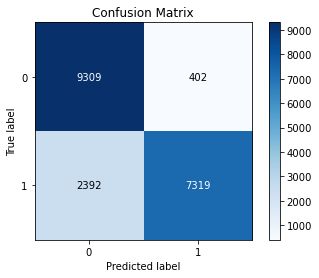

Accuracy: 0.85614 
Precision: 0.94793 
Recall: 0.75368 
F-measure: 0.83972 


In [111]:
y_probe_rfe_prediction = NN(X_probe_rfe, y_probe, 13).predict(X_probe_test_rfe) >0.5
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 1)

Epoch 1/40
1347/1347 [==============================] - 4s 2ms/step - loss: 0.0586 - accuracy: 0.0240 - precision_31: 0.9781
Epoch 2/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0301 - accuracy: 0.1072 - precision_31: 0.9895
Epoch 3/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0252 - accuracy: 0.1667 - precision_31: 0.9914
Epoch 4/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0223 - accuracy: 0.1788 - precision_31: 0.9925
Epoch 5/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0208 - accuracy: 0.1811 - precision_31: 0.9930
Epoch 6/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0195 - accuracy: 0.1964 - precision_31: 0.9936
Epoch 7/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0189 - accuracy: 0.2026 - precision_31: 0.9934
Epoch 8/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0181 - accuracy: 0.2096 - precision_31: 0.9935


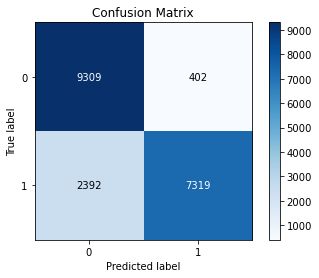

Accuracy: 0.85614 
Precision: 0.94793 
Recall: 0.75368 
F-measure: 0.83972 


In [112]:
y_r2l_rfe_prediction = NN(X_probe_rfe_ss, y_probe, 13).predict(X_probe_test_rfe_ss) >0.5
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 1)

#### K-fold cross validation on r2l

In [113]:
KfoldCVNN(modelNN(X_r2l_rfe, y_r2l, 13), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 1)

3789/3789 [==============================] - 3s 731us/step
>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
3789/3789 [==============================] - 3s 724us/step
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
3789/3789 [==============================] - 3s 724us/step
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
3789/3789 [==============================] - 3s 721us/step
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
3789/3789 [==============================] - 3s 732us/step
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
3789/3789 [==============================] - 3s 734us/step
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
3789/3789 [==============================] - 3s 739us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 725us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 733us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 716u

{'Mean Training Accuracy': 0.9352073213934098,
 'Mean Training Precision': 0.9562092070316879,
 'Mean Training Recall': 0.91406649825289,
 'Mean Training F1 Score': 0.9325386377016305,
 'Mean Validation Accuracy': 0.8825335661162373,
 'Mean Validation Precision': 0.5658514474550331,
 'Mean Validation Recall': 0.9106795919642199,
 'Mean Validation F1 Score': 0.5782533373730444}

#### K-fold cross validation on r2l Standard Scaler

In [114]:
KfoldCVNN(modelNN(X_r2l_rfe_ss, y_r2l, 13), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 1)

3789/3789 [==============================] - 3s 723us/step
>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
3789/3789 [==============================] - 3s 719us/step
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
3789/3789 [==============================] - 3s 748us/step
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
3789/3789 [==============================] - 3s 724us/step
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
3789/3789 [==============================] - 3s 722us/step
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
3789/3789 [==============================] - 3s 725us/step
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
3789/3789 [==============================] - 3s 734us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 723us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 725us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 724u

{'Mean Training Accuracy': 0.9914525424747536,
 'Mean Training Precision': 0.987865354640294,
 'Mean Training Recall': 0.9952468513163332,
 'Mean Training F1 Score': 0.9915362775628708,
 'Mean Validation Accuracy': 0.9893605972138158,
 'Mean Validation Precision': 0.7431854042686596,
 'Mean Validation Recall': 0.9931553004375292,
 'Mean Validation F1 Score': 0.8230058155052451}

#### Stratified cross validation on r2l

In [115]:
stratifiedCVNN(modelNN(X_r2l_rfe, y_r2l, 13), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 1)

3789/3789 [==============================] - 3s 727us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 730us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 730us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 739us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 724us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 742us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 724us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 731us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 713us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3

{'Mean Training Accuracy': 0.9332059734952051,
 'Mean Training Precision': 0.9378121547551445,
 'Mean Training Recall': 0.9325607012714384,
 'Mean Training F1 Score': 0.9327525682820598,
 'Mean Validation Accuracy': 0.932769421595615,
 'Mean Validation Precision': 0.937329946150804,
 'Mean Validation Recall': 0.9322140104322733,
 'Mean Validation F1 Score': 0.9323425194307415}

#### Stratified cross validation on r2l Standard Scaler

In [116]:
stratifiedCVNN(modelNN(X_r2l_rfe_ss, y_r2l, 13), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 1)

3789/3789 [==============================] - 3s 732us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 794us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 731us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 727us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 727us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 732us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 734us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 727us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 714us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3

{'Mean Training Accuracy': 0.9895848285873508,
 'Mean Training Precision': 0.98846428610733,
 'Mean Training Recall': 0.9907604289806317,
 'Mean Training F1 Score': 0.9895733105288789,
 'Mean Validation Accuracy': 0.9892564977166656,
 'Mean Validation Precision': 0.9881107091995138,
 'Mean Validation Recall': 0.990451616843599,
 'Mean Validation F1 Score': 0.989245612541587}

#### Predict on r2l

Epoch 1/40
1347/1347 [==============================] - 4s 3ms/step - loss: 348.4804 - accuracy: 0.3233 - precision_32: 0.8029
Epoch 2/40
1347/1347 [==============================] - 4s 3ms/step - loss: 76.6408 - accuracy: 0.2494 - precision_32: 0.9076
Epoch 3/40
1347/1347 [==============================] - 4s 3ms/step - loss: 37.8648 - accuracy: 0.1696 - precision_32: 0.9240
Epoch 4/40
1347/1347 [==============================] - 4s 3ms/step - loss: 2.8810 - accuracy: 0.1241 - precision_32: 0.9439
Epoch 5/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.1199 - accuracy: 0.0625 - precision_32: 0.9764
Epoch 6/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0958 - accuracy: 0.0754 - precision_32: 0.9459
Epoch 7/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0723 - accuracy: 0.0821 - precision_32: 0.9647
Epoch 8/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0792 - accuracy: 0.1117 - precision_32: 0.9

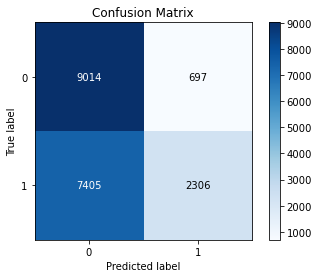

Accuracy: 0.58284 
Precision: 0.76790 
Recall: 0.23746 
F-measure: 0.36275 


In [117]:
y_r2l_rfe_prediction = NN(X_r2l_rfe, y_r2l, 13).predict(X_r2l_test_rfe) >0.5
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 1)

Epoch 1/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0724 - accuracy: 0.0128 - precision_33: 0.9742
Epoch 2/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0437 - accuracy: 0.0479 - precision_33: 0.9816
Epoch 3/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0370 - accuracy: 0.0548 - precision_33: 0.9840
Epoch 4/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0329 - accuracy: 0.0659 - precision_33: 0.9855
Epoch 5/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0304 - accuracy: 0.0818 - precision_33: 0.9867
Epoch 6/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0299 - accuracy: 0.0950 - precision_33: 0.9869
Epoch 7/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0268 - accuracy: 0.1322 - precision_33: 0.9882
Epoch 8/40
1347/1347 [==============================] - 3s 2ms/step - loss: 0.0260 - accuracy: 0.1626 - precision_33: 0.9886


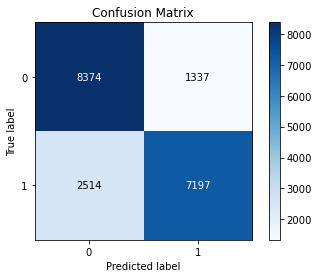

Accuracy: 0.80172 
Precision: 0.84333 
Recall: 0.74112 
F-measure: 0.78893 


In [118]:
y_r2l_rfe_prediction = NN(X_r2l_rfe_ss, y_r2l, 13).predict(X_r2l_test_rfe_ss) >0.5
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 1)

#### K-fold cross validation on u2r

In [119]:
KfoldCVNN(modelNN(X_u2r_rfe, y_u2r, 13), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 1)

3789/3789 [==============================] - 3s 738us/step
>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
3789/3789 [==============================] - 3s 700us/step
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
3789/3789 [==============================] - 3s 728us/step
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
3789/3789 [==============================] - 3s 727us/step
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
3789/3789 [==============================] - 3s 728us/step
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
3789/3789 [==============================] - 3s 784us/step
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
3789/3789 [==============================] - 3s 731us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 783us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 725us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 733us/step
>

{'Mean Training Accuracy': 0.9864243958698804,
 'Mean Training Precision': 0.9774629093287366,
 'Mean Training Recall': 0.9958754735008949,
 'Mean Training F1 Score': 0.9864177695640564,
 'Mean Validation Accuracy': 0.990118038930126,
 'Mean Validation Precision': 0.5177946739974313,
 'Mean Validation Recall': 0.9657754407754409,
 'Mean Validation F1 Score': 0.5342037547430125}

#### K-fold cross validation on u2r Standard Scaler

In [120]:
KfoldCVNN(modelNN(X_u2r_rfe_ss, y_u2r, 13), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 1)

3789/3789 [==============================] - 3s 741us/step
>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
3789/3789 [==============================] - 3s 742us/step
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
3789/3789 [==============================] - 3s 772us/step
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
3789/3789 [==============================] - 3s 740us/step
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
3789/3789 [==============================] - 3s 740us/step
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
3789/3789 [==============================] - 3s 745us/step
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
3789/3789 [==============================] - 3s 740us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 742us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 724us/step
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
3789/3789 [==============================] - 3s 729us/step
>

{'Mean Training Accuracy': 0.9969121592766796,
 'Mean Training Precision': 0.9952746536851018,
 'Mean Training Recall': 0.998448610784575,
 'Mean Training F1 Score': 0.9968530834670235,
 'Mean Validation Accuracy': 0.9953224845718722,
 'Mean Validation Precision': 0.5592945901872481,
 'Mean Validation Recall': 0.9985446985446986,
 'Mean Validation F1 Score': 0.6039057196301034}

#### Stratified cross validation on u2r

In [121]:
stratifiedCVNN(modelNN(X_u2r_rfe, y_u2r, 13), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 1)

3789/3789 [==============================] - 3s 737us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 743us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 745us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 758us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 739us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 749us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 753us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 739us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 752us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3

{'Mean Training Accuracy': 0.975336817589147,
 'Mean Training Precision': 0.9814390835656862,
 'Mean Training Recall': 0.969233457424477,
 'Mean Training F1 Score': 0.9732539270150969,
 'Mean Validation Accuracy': 0.9753060377587068,
 'Mean Validation Precision': 0.9812253411978087,
 'Mean Validation Recall': 0.9693984784853382,
 'Mean Validation F1 Score': 0.9732066505297932}

#### Stratified cross validation on u2r Standard Scaler

In [122]:
stratifiedCVNN(modelNN(X_u2r_rfe_ss, y_u2r, 13), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 1)

3789/3789 [==============================] - 3s 728us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 734us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 756us/step
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
3789/3789 [==============================] - 3s 751us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 720us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 744us/step
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
3789/3789 [==============================] - 3s 739us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 759us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3s 746us/step
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
3789/3789 [==============================] - 3

{'Mean Training Accuracy': 0.9964361500943424,
 'Mean Training Precision': 0.994151648526136,
 'Mean Training Recall': 0.9987559499912564,
 'Mean Training F1 Score': 0.9964459549812172,
 'Mean Validation Accuracy': 0.9961837672413809,
 'Mean Validation Precision': 0.9936723801388767,
 'Mean Validation Recall': 0.998737843548534,
 'Mean Validation F1 Score': 0.9961956630851094}

#### Predict on u2r

Epoch 1/40
1347/1347 [==============================] - 4s 3ms/step - loss: 9.4761 - accuracy: 0.4401 - precision_34: 0.9229
Epoch 2/40
1347/1347 [==============================] - 4s 3ms/step - loss: 2.1919 - accuracy: 0.4966 - precision_34: 0.9592
Epoch 3/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.6858 - accuracy: 0.4911 - precision_34: 0.9698
Epoch 4/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0583 - accuracy: 0.5161 - precision_34: 0.9805
Epoch 5/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0567 - accuracy: 0.5324 - precision_34: 0.9810
Epoch 6/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0473 - accuracy: 0.5227 - precision_34: 0.9816
Epoch 7/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0477 - accuracy: 0.5333 - precision_34: 0.9807
Epoch 8/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0532 - accuracy: 0.5346 - precision_34: 0.9809


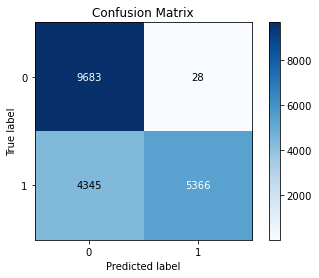

Accuracy: 0.77484 
Precision: 0.99481 
Recall: 0.55257 
F-measure: 0.71049 


In [123]:
y_u2r_rfe_prediction = NN(X_u2r_rfe, y_u2r, 13).predict(X_u2r_test_rfe) >0.5
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 1)

Epoch 1/40
1347/1347 [==============================] - 5s 3ms/step - loss: 0.0437 - accuracy: 0.0288 - precision_35: 0.9813
Epoch 2/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0145 - accuracy: 0.2411 - precision_35: 0.9931
Epoch 3/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0123 - accuracy: 0.3488 - precision_35: 0.9945
Epoch 4/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0106 - accuracy: 0.3689 - precision_35: 0.9954
Epoch 5/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0099 - accuracy: 0.3796 - precision_35: 0.9956
Epoch 6/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0082 - accuracy: 0.4081 - precision_35: 0.9963
Epoch 7/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0090 - accuracy: 0.4366 - precision_35: 0.9961
Epoch 8/40
1347/1347 [==============================] - 4s 3ms/step - loss: 0.0083 - accuracy: 0.3986 - precision_35: 0.9963


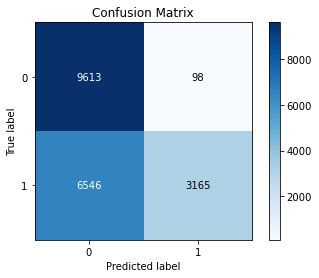

Accuracy: 0.65791 
Precision: 0.96997 
Recall: 0.32592 
F-measure: 0.48790 


In [124]:
y_u2r_rfe_prediction = NN(X_u2r_rfe_ss, y_u2r, 13).predict(X_u2r_test_rfe_ss) >0.5
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 1)

# Full DF, no Oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

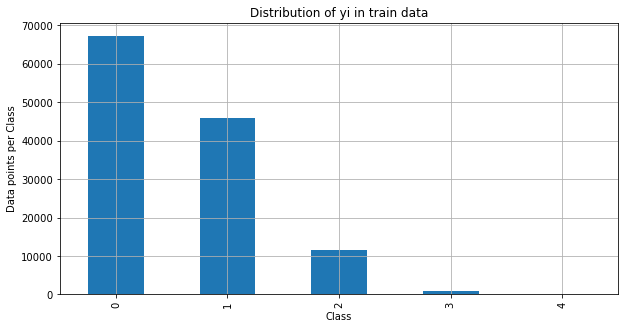

In [125]:
fullDf = getFullDf()
fullDf_test = getFullDfTest()


fullDf=oneHotEcoding(fullDf, 'protocol_type')
fullDf=oneHotEcoding(fullDf, 'service')
fullDf=oneHotEcoding(fullDf, 'flag')
fullDf_test=oneHotEcoding(fullDf_test, 'protocol_type')
fullDf_test=oneHotEcoding(fullDf_test, 'service')
fullDf_test=oneHotEcoding(fullDf_test, 'flag')

fullDf_test=adaptTestset(fullDf, fullDf_test)

fullDf['label'], fullDf_test['label'] = prepareMulticlass()

plotDf(fullDf['label'])

In [126]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(fullDf)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(fullDf_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)


In [127]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

In [128]:
y_probe=y_probe.replace(2, 1)
y_probe_test=y_probe_test.replace(2, 1)
y_r2l=y_r2l.replace(3, 1)
y_r2l_test=y_r2l_test.replace(3, 1)
y_u2r=y_u2r.replace(4, 1)
y_u2r_test=y_u2r_test.replace(4, 1)

#### K-fold cross validation on dos

In [129]:
KfoldCVNN(modelNN(X_dos, y_dos, 122), pd.DataFrame(X_dos), y_dos, 10, 1)

3186/3186 [==============================] - 3s 952us/step
>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
3186/3186 [==============================] - 3s 962us/step
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
3186/3186 [==============================] - 3s 928us/step
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
3186/3186 [==============================] - 3s 932us/step
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
3186/3186 [==============================] - 3s 932us/step
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
3186/3186 [==============================] - 3s 969us/step
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
3186/3186 [==============================] - 3s 977us/step
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
3186/3186 [==============================] - 3s 957us/step
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
3186/3186 [==============================] - 3s 943us/step
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
3186/3186 [==============================] - 3

{'Mean Training Accuracy': 0.988465122666588,
 'Mean Training Precision': 0.986822636050178,
 'Mean Training Recall': 0.9850259325779398,
 'Mean Training F1 Score': 0.9858235469347794,
 'Mean Validation Accuracy': 0.9884876842941643,
 'Mean Validation Precision': 0.9861726076352048,
 'Mean Validation Recall': 0.9856899619040504,
 'Mean Validation F1 Score': 0.9858331199376098}

#### K-fold cross validation on dos Standard Scaling

In [130]:
KfoldCVNN(modelNN(X_dos, y_dos, 122), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

3186/3186 [==============================] - 3s 941us/step
>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
3186/3186 [==============================] - 3s 914us/step
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
3186/3186 [==============================] - 3s 943us/step
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
3186/3186 [==============================] - 3s 940us/step
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
3186/3186 [==============================] - 3s 936us/step
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
3186/3186 [==============================] - 3s 930us/step
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
3186/3186 [==============================] - 3s 968us/step
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
3186/3186 [==============================] - 3s 964us/step
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
3186/3186 [==============================] - 3s 962us/step
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
3186/3186 [==============================] - 3

{'Mean Training Accuracy': 0.9990887064339875,
 'Mean Training Precision': 0.9990226429013622,
 'Mean Training Recall': 0.9987301841620126,
 'Mean Training F1 Score': 0.9988759088012304,
 'Mean Validation Accuracy': 0.999055354462788,
 'Mean Validation Precision': 0.9988452852958607,
 'Mean Validation Recall': 0.9988248143770214,
 'Mean Validation F1 Score': 0.9988345076124897}

#### Stratified cross validation on dos

In [131]:
stratifiedCVNN(modelNN(X_dos, y_dos, 122), pd.DataFrame(X_dos), y_dos, 10, 1)

3186/3186 [==============================] - 3s 953us/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 3s 948us/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 3s 934us/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 3s 939us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 970us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 980us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 970us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 967us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 945us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3

{'Mean Training Accuracy': 0.989205732615285,
 'Mean Training Precision': 0.9881426068241709,
 'Mean Training Recall': 0.9852737653238137,
 'Mean Training F1 Score': 0.9866651575104676,
 'Mean Validation Accuracy': 0.989070362849828,
 'Mean Validation Precision': 0.9881092234527526,
 'Mean Validation Recall': 0.9849758637026046,
 'Mean Validation F1 Score': 0.9865021369460576}

#### Stratified cross validation on dos Standard Scaling

In [132]:
stratifiedCVNN(modelNN(X_dos, y_dos, 122), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

3186/3186 [==============================] - 3s 944us/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 3s 953us/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 3s 960us/step
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
3186/3186 [==============================] - 3s 977us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 987us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 961us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 960us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 963us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3s 961us/step
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
3186/3186 [==============================] - 3

{'Mean Training Accuracy': 0.9991191155841991,
 'Mean Training Precision': 0.998939029159429,
 'Mean Training Recall': 0.9988895446336084,
 'Mean Training F1 Score': 0.9989137810240887,
 'Mean Validation Accuracy': 0.9991436390924339,
 'Mean Validation Precision': 0.9990426199260826,
 'Mean Validation Recall': 0.9988459752797583,
 'Mean Validation F1 Score': 0.9989438585062956}

#### Predict on dos

Epoch 1/40
1133/1133 [==============================] - 5s 4ms/step - loss: 12.9039 - accuracy: 0.3847 - precision_36: 0.9675
Epoch 2/40
1133/1133 [==============================] - 5s 4ms/step - loss: 28.3292 - accuracy: 0.6221 - precision_36: 0.9664
Epoch 3/40
1133/1133 [==============================] - 5s 4ms/step - loss: 51.4601 - accuracy: 0.6452 - precision_36: 0.9731
Epoch 4/40
1133/1133 [==============================] - 5s 4ms/step - loss: 28.5476 - accuracy: 0.5844 - precision_36: 0.9807
Epoch 5/40
1133/1133 [==============================] - 5s 4ms/step - loss: 19.7779 - accuracy: 0.5852 - precision_36: 0.9817
Epoch 6/40
1133/1133 [==============================] - 5s 4ms/step - loss: 34.5458 - accuracy: 0.7695 - precision_36: 0.9797
Epoch 7/40
1133/1133 [==============================] - 5s 4ms/step - loss: 6.4760 - accuracy: 0.5847 - precision_36: 0.9907
Epoch 8/40
1133/1133 [==============================] - 4s 4ms/step - loss: 10.1658 - accuracy: 0.6812 - precision_36: 

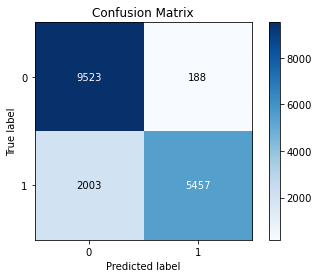

Accuracy: 0.87240 
Precision: 0.96670 
Recall: 0.73150 
F-measure: 0.83281 


In [133]:
y_dos_prediction = NN(X_dos, y_dos, 122).predict(X_dos_test) > 0.5
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

Epoch 1/40
1133/1133 [==============================] - 6s 4ms/step - loss: 0.0195 - accuracy: 0.0016 - precision_37: 0.9959
Epoch 2/40
1133/1133 [==============================] - 5s 4ms/step - loss: 0.0041 - accuracy: 0.0228 - precision_37: 0.9983
Epoch 3/40
1133/1133 [==============================] - 5s 4ms/step - loss: 0.0027 - accuracy: 0.1777 - precision_37: 0.9988
Epoch 4/40
1133/1133 [==============================] - 5s 4ms/step - loss: 0.0025 - accuracy: 0.2463 - precision_37: 0.9990
Epoch 5/40
1133/1133 [==============================] - 5s 4ms/step - loss: 0.0022 - accuracy: 0.2955 - precision_37: 0.9991
Epoch 6/40
1133/1133 [==============================] - 7s 6ms/step - loss: 0.0018 - accuracy: 0.3178 - precision_37: 0.9993
Epoch 7/40
1133/1133 [==============================] - 7s 6ms/step - loss: 0.0020 - accuracy: 0.3288 - precision_37: 0.9991
Epoch 8/40
1133/1133 [==============================] - 6s 5ms/step - loss: 0.0018 - accuracy: 0.3473 - precision_37: 0.9993


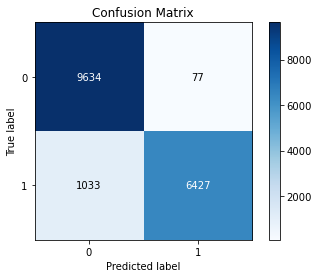

Accuracy: 0.93536 
Precision: 0.98816 
Recall: 0.86153 
F-measure: 0.92051 


In [134]:
y_dos_prediction = NN(X_dos_ss, y_dos, 122).predict(X_dos_test_ss) > 0.5
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [135]:
KfoldCVNN(modelNN(X_probe, y_probe, 122), pd.DataFrame(X_probe), y_probe, 10, 1)

2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
2222/2222 [==============================] - 4s 2ms/step
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
2222/2222 [==============================] - 4s 2ms/step
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
2222/2222 [==============================] - 5s 2ms/step
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
2222/2222 [==============================] - 4s 2ms/step
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
2222/2222 [==============================] - 4s 2ms/step
>Train:

{'Mean Training Accuracy': 0.9661978727231413,
 'Mean Training Precision': 0.8554081077952425,
 'Mean Training Recall': 0.9422694201529339,
 'Mean Training F1 Score': 0.8948159994781371,
 'Mean Validation Accuracy': 0.966176893085329,
 'Mean Validation Precision': 0.8547889518337731,
 'Mean Validation Recall': 0.9422065400301936,
 'Mean Validation F1 Score': 0.894362049270294}

#### K-fold cross validation on probe Standard Scaling

In [136]:
KfoldCVNN(modelNN(X_probe_ss, y_probe, 122), pd.DataFrame(X_probe_ss), y_probe, 10, 1)

2222/2222 [==============================] - 5s 2ms/step
>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
2222/2222 [==============================] - 4s 2ms/step
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
2222/2222 [==============================] - 4s 2ms/step
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
2222/2222 [==============================] - 5s 2ms/step
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
2222/2222 [==============================] - 5s 2ms/step
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
2222/2222 [==============================] - 4s 2ms/step
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
2222/2222 [==============================] - 4s 2ms/step
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
2222/2222 [==============================] - 5s 2ms/step
>Train:

{'Mean Training Accuracy': 0.9968663442066845,
 'Mean Training Precision': 0.992848154824505,
 'Mean Training Recall': 0.9858443482571374,
 'Mean Training F1 Score': 0.9893137422690874,
 'Mean Validation Accuracy': 0.9967214917446687,
 'Mean Validation Precision': 0.991957829545308,
 'Mean Validation Recall': 0.9857865215545694,
 'Mean Validation F1 Score': 0.9888479759228727}

#### Stratified cross validation on probe

In [137]:
stratifiedCVNN(modelNN(X_probe, y_probe, 122), pd.DataFrame(X_probe), y_probe, 10, 1)

2222/2222 [==============================] - 4s 2ms/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 5s 2ms/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 5s 2ms/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 4s 2ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 4s 2ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 5s 2ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 5s 2ms/step
>Train:

{'Mean Training Accuracy': 0.97243142966853,
 'Mean Training Precision': 0.8889244771132564,
 'Mean Training Recall': 0.9602684574430723,
 'Mean Training F1 Score': 0.9183195900738477,
 'Mean Validation Accuracy': 0.9726073000748372,
 'Mean Validation Precision': 0.8907107132225404,
 'Mean Validation Recall': 0.9599354382761947,
 'Mean Validation F1 Score': 0.9189724935676281}

#### Stratified cross validation on probe Standard Scaling

In [138]:
stratifiedCVNN(modelNN(X_probe_ss, y_probe, 122), pd.DataFrame(X_probe_ss), y_probe, 10, 1)

2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 5s 2ms/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
2222/2222 [==============================] - 4s 2ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 5s 2ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 4s 2ms/step
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
2222/2222 [==============================] - 3s 1ms/step
>Train:

{'Mean Training Accuracy': 0.997219372251077,
 'Mean Training Precision': 0.9938190333142678,
 'Mean Training Recall': 0.9873121325383172,
 'Mean Training F1 Score': 0.990543876141453,
 'Mean Validation Accuracy': 0.9968987133445829,
 'Mean Validation Precision': 0.9932055118934949,
 'Mean Validation Recall': 0.9857587290836947,
 'Mean Validation F1 Score': 0.9894492519033339}

#### Predict on probe

Epoch 1/40
790/790 [==============================] - 6s 5ms/step - loss: 3012.7336 - accuracy: 0.5325 - precision_38: 0.6118
Epoch 2/40
790/790 [==============================] - 5s 6ms/step - loss: 13481.0596 - accuracy: 0.7943 - precision_38: 0.6102
Epoch 3/40
790/790 [==============================] - 4s 5ms/step - loss: 34969.6641 - accuracy: 0.9075 - precision_38: 0.7335
Epoch 4/40
790/790 [==============================] - 5s 6ms/step - loss: 3788.1289 - accuracy: 0.9159 - precision_38: 0.8080
Epoch 5/40
790/790 [==============================] - 4s 5ms/step - loss: 16462.6523 - accuracy: 0.8858 - precision_38: 0.7233
Epoch 6/40
790/790 [==============================] - 5s 6ms/step - loss: 21074.4160 - accuracy: 0.9047 - precision_38: 0.7979
Epoch 7/40
790/790 [==============================] - 4s 5ms/step - loss: 13278.2354 - accuracy: 0.9053 - precision_38: 0.8268
Epoch 8/40
790/790 [==============================] - 5s 6ms/step - loss: 9055.2793 - accuracy: 0.9147 - precisio

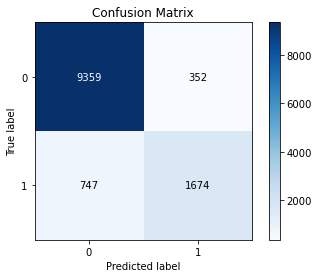

Accuracy: 0.90941 
Precision: 0.82626 
Recall: 0.69145 
F-measure: 0.75287 


In [139]:
y_probe_prediction = NN(X_probe, y_probe, 122).predict(X_probe_test) >0.5
plotConfusionMatrix(y_probe_prediction, y_probe_test, 1)

Epoch 1/40
790/790 [==============================] - 6s 5ms/step - loss: 0.0385 - accuracy: 0.0021 - precision_39: 0.9618
Epoch 2/40
790/790 [==============================] - 4s 5ms/step - loss: 0.0129 - accuracy: 0.0033 - precision_39: 0.9841
Epoch 3/40
790/790 [==============================] - 5s 6ms/step - loss: 0.0104 - accuracy: 0.0053 - precision_39: 0.9872
Epoch 4/40
790/790 [==============================] - 5s 6ms/step - loss: 0.0092 - accuracy: 0.0067 - precision_39: 0.9891
Epoch 5/40
790/790 [==============================] - 4s 5ms/step - loss: 0.0080 - accuracy: 0.0159 - precision_39: 0.9922
Epoch 6/40
790/790 [==============================] - 5s 6ms/step - loss: 0.0068 - accuracy: 0.0221 - precision_39: 0.9932
Epoch 7/40
790/790 [==============================] - 4s 5ms/step - loss: 0.0061 - accuracy: 0.0258 - precision_39: 0.9934
Epoch 8/40
790/790 [==============================] - 4s 5ms/step - loss: 0.0062 - accuracy: 0.0446 - precision_39: 0.9932
Epoch 9/40
790/7

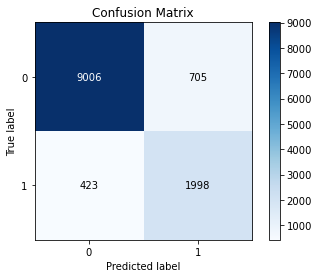

Accuracy: 0.90702 
Precision: 0.73918 
Recall: 0.82528 
F-measure: 0.77986 


In [140]:
y_probe_prediction = NN(X_probe_ss, y_probe, 122).predict(X_probe_test_ss) >0.5
plotConfusionMatrix(y_probe_prediction, y_probe_test, 1)

#### K-fold cross validation on r2l

In [141]:
KfoldCVNN(modelNN(X_r2l, y_r2l, 122), pd.DataFrame(X_r2l), y_r2l, 10, 1)

1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60615, 1=889, Test: 0=6728, 1=106
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
1922/1922 [==============================] - 3s 2ms/step
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
1922/1922 [==============================] - 4s 2ms/step
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
1922/1922 [==============================] - 4s 2ms/step
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
1922/1922 [==============================] - 3s 2ms/step
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
1923/1923 [==============================] - 3s 1ms/step
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
1923/1923 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=897, Test: 0=6735,

{'Mean Training Accuracy': 0.99125589446422,
 'Mean Training Precision': 0.7786599774428826,
 'Mean Training Recall': 0.5125032221419876,
 'Mean Training F1 Score': 0.5899988474678786,
 'Mean Validation Accuracy': 0.9908102478799261,
 'Mean Validation Precision': 0.758566153029757,
 'Mean Validation Recall': 0.5000717034626121,
 'Mean Validation F1 Score': 0.5767967806425285}

#### K-fold cross validation on r2l Standard Scaling

In [142]:
KfoldCVNN(modelNN(X_r2l_ss, y_r2l, 122), pd.DataFrame(X_r2l_ss), y_r2l, 10, 1)

1922/1922 [==============================] - 4s 2ms/step
>Train: 0=60615, 1=889, Test: 0=6728, 1=106
1922/1922 [==============================] - 3s 2ms/step
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
1922/1922 [==============================] - 3s 2ms/step
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
1923/1923 [==============================] - 2s 1ms/step
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
1923/1923 [==============================] - 3s 2ms/step
>Train: 0=60608, 1=897, Test: 0=6735,

{'Mean Training Accuracy': 0.996605106653808,
 'Mean Training Precision': 0.8763471969200338,
 'Mean Training Recall': 0.8949517636094215,
 'Mean Training F1 Score': 0.8846961002841256,
 'Mean Validation Accuracy': 0.9961222610015323,
 'Mean Validation Precision': 0.8673133658052647,
 'Mean Validation Recall': 0.8779029238429666,
 'Mean Validation F1 Score': 0.8711426454771978}

#### Stratified cross validation on r2l

In [143]:
stratifiedCVNN(modelNN(X_r2l, y_r2l, 122), pd.DataFrame(X_r2l), y_r2l, 10, 1)

1922/1922 [==============================] - 4s 2ms/step
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
1922/1922 [==============================] - 3s 2ms/step
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
1922/1922 [==============================] - 3s 2ms/step
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 3s 2ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1923/1923 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
1923/1923 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=896, Test: 0=6734, 

{'Mean Training Accuracy': 0.9917891917632561,
 'Mean Training Precision': 0.8253470568834669,
 'Mean Training Recall': 0.5159133080606544,
 'Mean Training F1 Score': 0.5864873322894634,
 'Mean Validation Accuracy': 0.9917321776890462,
 'Mean Validation Precision': 0.7961133100589614,
 'Mean Validation Recall': 0.5126363636363636,
 'Mean Validation F1 Score': 0.5871057590850632}

#### Stratified cross validation on r2l Standard Scaling

In [144]:
stratifiedCVNN(modelNN(X_r2l_ss, y_r2l, 122), pd.DataFrame(X_r2l_ss), y_r2l, 10, 1)

1922/1922 [==============================] - 3s 2ms/step
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
1922/1922 [==============================] - 4s 2ms/step
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 3s 2ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 3s 2ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1922/1922 [==============================] - 3s 1ms/step
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
1923/1923 [==============================] - 3s 2ms/step
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
1923/1923 [==============================] - 3s 2ms/step
>Train: 0=60609, 1=896, Test: 0=6734, 

{'Mean Training Accuracy': 0.9967368051936253,
 'Mean Training Precision': 0.8895627158435125,
 'Mean Training Recall': 0.8886679469273743,
 'Mean Training F1 Score': 0.8884668200853396,
 'Mean Validation Accuracy': 0.9964588178159486,
 'Mean Validation Precision': 0.88563358429088,
 'Mean Validation Recall': 0.8734444444444446,
 'Mean Validation F1 Score': 0.8783389661329617}

#### Predict on r2l

Epoch 1/40
684/684 [==============================] - 6s 7ms/step - loss: 83.6478 - accuracy: 0.1810 - precision_40: 0.0386
Epoch 2/40
684/684 [==============================] - 4s 6ms/step - loss: 28.0995 - accuracy: 0.0281 - precision_40: 0.0233
Epoch 3/40
684/684 [==============================] - 4s 5ms/step - loss: 0.0559 - accuracy: 0.0026 - precision_40: 0.5963
Epoch 4/40
684/684 [==============================] - 4s 7ms/step - loss: 0.0389 - accuracy: 0.0027 - precision_40: 0.9231
Epoch 5/40
684/684 [==============================] - 5s 7ms/step - loss: 0.0569 - accuracy: 0.0023 - precision_40: 0.8698
Epoch 6/40
684/684 [==============================] - 5s 7ms/step - loss: 0.0417 - accuracy: 0.0021 - precision_40: 0.9145
Epoch 7/40
684/684 [==============================] - 3s 5ms/step - loss: 0.0364 - accuracy: 0.0018 - precision_40: 0.9080
Epoch 8/40
684/684 [==============================] - 5s 7ms/step - loss: 0.0645 - accuracy: 0.0049 - precision_40: 0.9010
Epoch 9/40
684

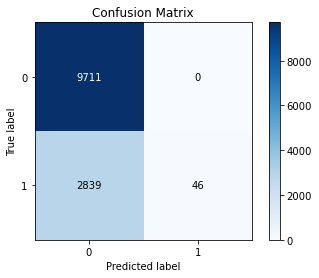

Accuracy: 0.77461 
Precision: 1.00000 
Recall: 0.01594 
F-measure: 0.03139 


In [145]:
y_r2l_prediction = NN(X_r2l, y_r2l, 122).predict(X_r2l_test) >0.5
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 1)

Epoch 1/40
684/684 [==============================] - 5s 5ms/step - loss: 0.0374 - accuracy: 4.3899e-05 - precision_41: 0.6598
Epoch 2/40
684/684 [==============================] - 3s 5ms/step - loss: 0.0133 - accuracy: 1.4633e-05 - precision_41: 0.8675
Epoch 3/40
684/684 [==============================] - 4s 6ms/step - loss: 0.0114 - accuracy: 4.3899e-05 - precision_41: 0.8758
Epoch 4/40
684/684 [==============================] - 4s 7ms/step - loss: 0.0112 - accuracy: 1.1707e-04 - precision_41: 0.8943
Epoch 5/40
684/684 [==============================] - 4s 6ms/step - loss: 0.0094 - accuracy: 5.8533e-05 - precision_41: 0.8976
Epoch 6/40
684/684 [==============================] - 3s 4ms/step - loss: 0.0089 - accuracy: 1.7560e-04 - precision_41: 0.8976
Epoch 7/40
684/684 [==============================] - 4s 5ms/step - loss: 0.0085 - accuracy: 3.8046e-04 - precision_41: 0.9106
Epoch 8/40
684/684 [==============================] - 4s 6ms/step - loss: 0.0076 - accuracy: 3.6583e-04 - preci

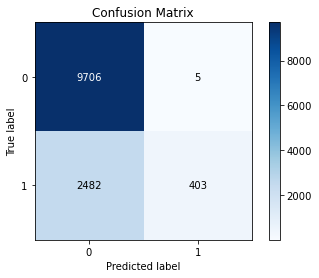

Accuracy: 0.80256 
Precision: 0.98775 
Recall: 0.13969 
F-measure: 0.24476 


In [146]:
y_r2l_prediction = NN(X_r2l_ss, y_r2l, 122).predict(X_r2l_test_ss) >0.5
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 1)

#### K-fold cross validation on u2r

In [147]:
KfoldCVNN(modelNN(X_u2r, y_u2r, 122), pd.DataFrame(X_u2r), y_u2r, 10, 1)

1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
   1/1896 [..............................] - ETA: 13s - loss: 7.7665e-15

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 978us/step


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 964us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
   1/1896 [..............................] - ETA: 13s - loss: 3.1182e-06

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 992us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
   1/1896 [..............................] - ETA: 11s - loss: 3.6052e-11

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 973us/step
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
   1/1896 [..............................] - ETA: 11s - loss: 5.2587e-13

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
   1/1896 [..............................] - ETA: 11s - loss: 6.4410e-12

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 963us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
   1/1896 [..............................] - ETA: 13s - loss: 3.3181e-06

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
   1/1896 [..............................] - ETA: 13s - loss: 0.0024

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
   1/1896 [..............................] - ETA: 13s - loss: 2.9422e-04

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Mean Training Accuracy': 0.9992284294358381,
 'Mean Training Precision': 0.0,
 'Mean Training Recall': 0.0,
 'Mean Training F1 Score': 0.0,
 'Mean Validation Accuracy': 0.9992284316060946,
 'Mean Validation Precision': 0.0,
 'Mean Validation Recall': 0.0,
 'Mean Validation F1 Score': 0.0}

#### K-fold cross validation on u2r Standard Scaling

In [148]:
KfoldCVNN(modelNN(X_u2r_ss, y_u2r, 122), pd.DataFrame(X_u2r_ss), y_u2r, 10, 1)

1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 997us/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 997us/step
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
   1/1896 [..............................] - ETA: 11s - loss: 1.7594e-07

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
1896/1896 [==============================] - 2s 980us/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
   1/1896 [..............................] - ETA: 13s - loss: 5.7545e-09

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.99952848404065,
 'Mean Training Precision': 0.9035831174245809,
 'Mean Training Recall': 0.46579777651536614,
 'Mean Training F1 Score': 0.5456798204098079,
 'Mean Validation Accuracy': 0.9995251939307181,
 'Mean Validation Precision': 0.6847619047619047,
 'Mean Validation Recall': 0.44250000000000006,
 'Mean Validation F1 Score': 0.5172077922077922}

#### Stratified cross validation on u2r

In [149]:
stratifiedCVNN(modelNN(X_u2r, y_u2r, 122), pd.DataFrame(X_u2r), y_u2r, 10, 1)

1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
   1/1896 [..............................] - ETA: 13s - loss: 0.0000e+00

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
   1/1896 [..............................] - ETA: 13s - loss: 6.6621e-26

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
   1/1896 [..............................] - ETA: 13s - loss: 1.6240e-04

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
   1/1896 [..............................] - ETA: 13s - loss: 1.2489e-10

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
   1/1896 [..............................] - ETA: 13s - loss: 0.0040

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
   1/1896 [..............................] - ETA: 11s - loss: 1.0719e-17

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Mean Training Accuracy': 0.9992284294358381,
 'Mean Training Precision': 0.0,
 'Mean Training Recall': 0.0,
 'Mean Training F1 Score': 0.0,
 'Mean Validation Accuracy': 0.9992284316060946,
 'Mean Validation Precision': 0.0,
 'Mean Validation Recall': 0.0,
 'Mean Validation F1 Score': 0.0}

#### Stratified cross validation on u2r Standard Scaling

In [150]:
stratifiedCVNN(modelNN(X_u2r_ss, y_u2r, 122), pd.DataFrame(X_u2r_ss), y_u2r, 10, 1)

1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
   1/1896 [..............................] - ETA: 13s - loss: 1.0072e-04

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
1896/1896 [==============================] - 2s 1ms/step
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.99958453831438,
 'Mean Training Precision': 0.89880851862276,
 'Mean Training Recall': 0.5408418131359852,
 'Mean Training F1 Score': 0.6511328162476169,
 'Mean Validation Accuracy': 0.9995993823102424,
 'Mean Validation Precision': 0.7988095238095237,
 'Mean Validation Recall': 0.5933333333333333,
 'Mean Validation F1 Score': 0.6520923520923521}

#### Predict on u2r

Epoch 1/40
674/674 [==============================] - 4s 5ms/step - loss: 2.1134 - accuracy: 0.4483 - precision_42: 0.0000e+00
Epoch 2/40
674/674 [==============================] - 3s 5ms/step - loss: 0.1341 - accuracy: 0.4498 - precision_42: 0.0294
Epoch 3/40
674/674 [==============================] - 3s 5ms/step - loss: 0.1349 - accuracy: 0.5879 - precision_42: 0.1818
Epoch 4/40
674/674 [==============================] - 3s 5ms/step - loss: 0.1452 - accuracy: 0.7086 - precision_42: 0.1538
Epoch 5/40
674/674 [==============================] - 3s 5ms/step - loss: 0.1954 - accuracy: 0.7327 - precision_42: 0.1351
Epoch 6/40
674/674 [==============================] - 3s 5ms/step - loss: 0.1902 - accuracy: 0.6597 - precision_42: 0.2000
Epoch 7/40
674/674 [==============================] - 3s 5ms/step - loss: 0.0867 - accuracy: 0.5814 - precision_42: 0.4444
Epoch 8/40
674/674 [==============================] - 3s 5ms/step - loss: 0.0840 - accuracy: 0.6676 - precision_42: 0.3429
Epoch 9/40
6

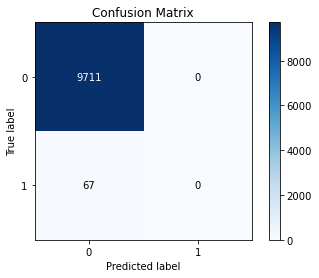

Accuracy: 0.99315 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
y_u2r_prediction = NN(X_u2r, y_u2r, 122).predict(X_u2r_test) >0.5
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 1)

Epoch 1/40
674/674 [==============================] - 4s 4ms/step - loss: 0.0144 - accuracy: 2.0773e-04 - precision_43: 0.0866
Epoch 2/40
674/674 [==============================] - 3s 4ms/step - loss: 0.0022 - accuracy: 1.9289e-04 - precision_43: 0.7667
Epoch 3/40
674/674 [==============================] - 3s 4ms/step - loss: 0.0018 - accuracy: 2.0773e-04 - precision_43: 0.8000
Epoch 4/40
674/674 [==============================] - 3s 4ms/step - loss: 0.0014 - accuracy: 2.5224e-04 - precision_43: 0.7949
Epoch 5/40
674/674 [==============================] - 3s 4ms/step - loss: 0.0014 - accuracy: 2.2257e-04 - precision_43: 0.7805
Epoch 6/40
674/674 [==============================] - 3s 4ms/step - loss: 0.0014 - accuracy: 3.5611e-04 - precision_43: 0.8462
Epoch 7/40
674/674 [==============================] - 3s 4ms/step - loss: 0.0012 - accuracy: 5.0449e-04 - precision_43: 0.8250
Epoch 8/40
674/674 [==============================] - 3s 4ms/step - loss: 0.0012 - accuracy: 4.7481e-04 - preci

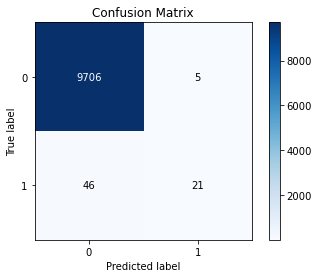

Accuracy: 0.99478 
Precision: 0.80769 
Recall: 0.31343 
F-measure: 0.45161 


In [152]:
y_u2r_prediction = NN(X_u2r_ss, y_u2r, 122).predict(X_u2r_test_ss) >0.5
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 1)

## Binary dataset no feature selection

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

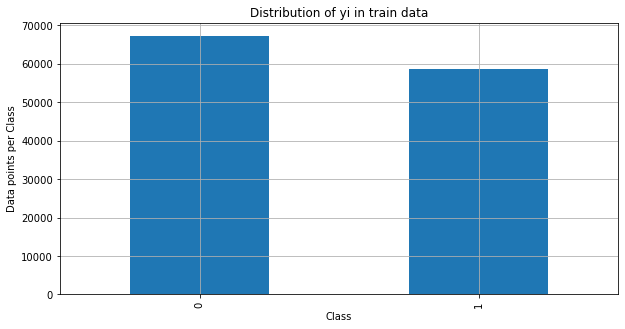

In [153]:
fullDf = getFullDf()
fullDf_test = getFullDfTest()

fullDf['label'], fullDf_test['label'] = prepareBinary()

fullDf=oneHotEcoding(fullDf, 'protocol_type')
fullDf=oneHotEcoding(fullDf, 'service')
fullDf=oneHotEcoding(fullDf, 'flag')
fullDf_test=oneHotEcoding(fullDf_test, 'protocol_type')
fullDf_test=oneHotEcoding(fullDf_test, 'service')
fullDf_test=oneHotEcoding(fullDf_test, 'flag')

fullDf_test=adaptTestset(fullDf, fullDf_test)

colNames=list(fullDf)
colNames_test=list(fullDf_test)

plotDf(fullDf['label'])


In [154]:
x_df, y_df = getXandY(fullDf)
x_df_test, y_df_test = getXandY(fullDf_test)

x_df_ss = standardScaler(x_df)
x_df_test_ss = standardScaler(x_df_test)


In [155]:
KfoldCVNN(modelNN(x_df, y_df, 122), pd.DataFrame(x_df), y_df, 10, 1)

3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
3543/3543 [==============================] - 4s 1ms/step
>Train:

{'Mean Training Accuracy': 0.9500077389582267,
 'Mean Training Precision': 0.9680994102143611,
 'Mean Training Recall': 0.9244448555347302,
 'Mean Training F1 Score': 0.9433870880503591,
 'Mean Validation Accuracy': 0.9506011272827667,
 'Mean Validation Precision': 0.9682315659585926,
 'Mean Validation Recall': 0.9258312953396602,
 'Mean Validation F1 Score': 0.9442584497957738}

In [156]:
KfoldCVNN(modelNN(x_df, y_df, 122), pd.DataFrame(x_df_ss), y_df, 10, 1)

3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
3543/3543 [==============================] - 4s 1ms/step
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
3543/3543 [==============================] - 4s 1ms/step
>Train:

{'Mean Training Accuracy': 0.9950500821067114,
 'Mean Training Precision': 0.9952895980715434,
 'Mean Training Recall': 0.9940748474104121,
 'Mean Training F1 Score': 0.9946799636348634,
 'Mean Validation Accuracy': 0.9945385522900162,
 'Mean Validation Precision': 0.9947241377347851,
 'Mean Validation Recall': 0.9935466762731016,
 'Mean Validation F1 Score': 0.994133060719529}

Epoch 1/40
1260/1260 [==============================] - 6s 5ms/step - loss: 1795.0162 - accuracy: 0.4365 - precision_44: 0.8525
Epoch 2/40
1260/1260 [==============================] - 6s 5ms/step - loss: 1237.7911 - accuracy: 0.7335 - precision_44: 0.9050
Epoch 3/40
1260/1260 [==============================] - 6s 5ms/step - loss: 3602.6309 - accuracy: 0.8387 - precision_44: 0.9325
Epoch 4/40
1260/1260 [==============================] - 6s 5ms/step - loss: 4010.7871 - accuracy: 0.8337 - precision_44: 0.9187
Epoch 5/40
1260/1260 [==============================] - 6s 5ms/step - loss: 2028.8862 - accuracy: 0.8418 - precision_44: 0.9408
Epoch 6/40
1260/1260 [==============================] - 6s 5ms/step - loss: 4251.4634 - accuracy: 0.8780 - precision_44: 0.9372
Epoch 7/40
1260/1260 [==============================] - 6s 5ms/step - loss: 6832.8853 - accuracy: 0.9218 - precision_44: 0.9470
Epoch 8/40
1260/1260 [==============================] - 6s 5ms/step - loss: 9417.4434 - accuracy: 0.9185

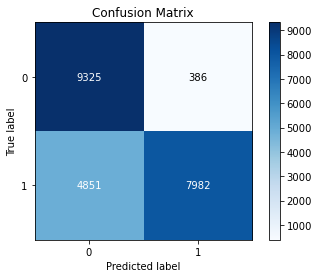

Accuracy: 0.76770 
Precision: 0.95387 
Recall: 0.62199 
F-measure: 0.75298 


In [157]:
y_prediction = NN(x_df, y_df, 122).predict(x_df_test)  >0.5
plotConfusionMatrix(y_prediction, y_df_test, 1)

Epoch 1/40
1260/1260 [==============================] - 7s 5ms/step - loss: 0.0453 - accuracy: 0.0020 - precision_45: 0.9866
Epoch 2/40
1260/1260 [==============================] - 6s 5ms/step - loss: 0.0195 - accuracy: 0.0852 - precision_45: 0.9924
Epoch 3/40
1260/1260 [==============================] - 6s 5ms/step - loss: 0.0165 - accuracy: 0.2064 - precision_45: 0.9937
Epoch 4/40
1260/1260 [==============================] - 6s 5ms/step - loss: 0.0149 - accuracy: 0.2655 - precision_45: 0.9944
Epoch 5/40
1260/1260 [==============================] - 6s 5ms/step - loss: 0.0135 - accuracy: 0.3052 - precision_45: 0.9953
Epoch 6/40
1260/1260 [==============================] - 6s 5ms/step - loss: 0.0124 - accuracy: 0.3092 - precision_45: 0.9956
Epoch 7/40
1260/1260 [==============================] - 6s 5ms/step - loss: 0.0116 - accuracy: 0.3470 - precision_45: 0.9961
Epoch 8/40
1260/1260 [==============================] - 6s 5ms/step - loss: 0.0108 - accuracy: 0.3504 - precision_45: 0.9967


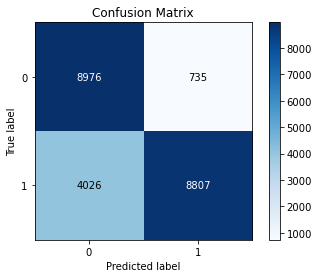

Accuracy: 0.78881 
Precision: 0.92297 
Recall: 0.68628 
F-measure: 0.78722 


In [158]:
y_prediction = NN(x_df_ss, y_df, 122).predict(x_df_test_ss)  >0.5
plotConfusionMatrix(y_prediction, y_df_test, 1)

## Binary dataset feature selection

In [159]:
X_df_rfe, rfecolname = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(x_df), y_df, 13)
X_df_test_rfe=x_df_test.values[:,rfecolname]

In [160]:
X_df_rfe_ss, rfecolname_ss = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(x_df_ss), y_df, 13)
X_df_test_rfe_ss=x_df_test_ss[:,rfecolname_ss]

#### K-fold cross validation

In [161]:
KfoldCVNN(modelNN(X_df_rfe, y_df, 13), pd.DataFrame(X_df_rfe), y_df, 10, 1)

3543/3543 [==============================] - 3s 769us/step
>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
3543/3543 [==============================] - 3s 789us/step
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
3543/3543 [==============================] - 3s 795us/step
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
3543/3543 [==============================] - 3s 820us/step
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
3543/3543 [==============================] - 3s 863us/step
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
3543/3543 [==============================] - 3s 824us/step
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
3543/3543 [==============================] - 3s 804us/step
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
3543/3543 [==============================] - 3s 871us/step
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
3543/3543 [==============================] - 3s 804us/step
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
3543/3543 [==============================] - 3

{'Mean Training Accuracy': 0.9404484882531545,
 'Mean Training Precision': 0.9403753293475571,
 'Mean Training Recall': 0.931725978847975,
 'Mean Training F1 Score': 0.9356743177149829,
 'Mean Validation Accuracy': 0.9408757881670432,
 'Mean Validation Precision': 0.9409636899999132,
 'Mean Validation Recall': 0.932498375072717,
 'Mean Validation F1 Score': 0.9363361607194485}

#### K-fold cross validation Standard Scaler

In [162]:
KfoldCVNN(modelNN(X_df_rfe_ss, y_df, 13), pd.DataFrame(X_df_rfe_ss), y_df, 10, 1)

3543/3543 [==============================] - 3s 768us/step
>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
3543/3543 [==============================] - 3s 780us/step
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
3543/3543 [==============================] - 3s 787us/step
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
3543/3543 [==============================] - 3s 838us/step
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
3543/3543 [==============================] - 3s 866us/step
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
3543/3543 [==============================] - 3s 815us/step
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
3543/3543 [==============================] - 3s 820us/step
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
3543/3543 [==============================] - 3s 831us/step
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
3543/3543 [==============================] - 3s 840us/step
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
3543/3543 [==============================] - 3

{'Mean Training Accuracy': 0.9839427528262787,
 'Mean Training Precision': 0.9835724511813984,
 'Mean Training Recall': 0.981950138889176,
 'Mean Training F1 Score': 0.9827427381154459,
 'Mean Validation Accuracy': 0.9837268076752499,
 'Mean Validation Precision': 0.9834053874325924,
 'Mean Validation Recall': 0.9816876347805816,
 'Mean Validation F1 Score': 0.9825250572824977}

#### Predict

Epoch 1/40
1260/1260 [==============================] - 5s 3ms/step - loss: 2230.9373 - accuracy: 0.4306 - precision_46: 0.7919
Epoch 2/40
1260/1260 [==============================] - 4s 3ms/step - loss: 6791.3218 - accuracy: 0.6872 - precision_46: 0.8385
Epoch 3/40
1260/1260 [==============================] - 4s 3ms/step - loss: 2658.4761 - accuracy: 0.7240 - precision_46: 0.8699
Epoch 4/40
1260/1260 [==============================] - 4s 3ms/step - loss: 3070.0352 - accuracy: 0.6913 - precision_46: 0.8450
Epoch 5/40
1260/1260 [==============================] - 4s 3ms/step - loss: 4081.6301 - accuracy: 0.8078 - precision_46: 0.8665
Epoch 6/40
1260/1260 [==============================] - 4s 3ms/step - loss: 2725.7725 - accuracy: 0.7894 - precision_46: 0.9078
Epoch 7/40
1260/1260 [==============================] - 4s 3ms/step - loss: 7477.5908 - accuracy: 0.7906 - precision_46: 0.8789
Epoch 8/40
1260/1260 [==============================] - 4s 3ms/step - loss: 4318.7661 - accuracy: 0.8495

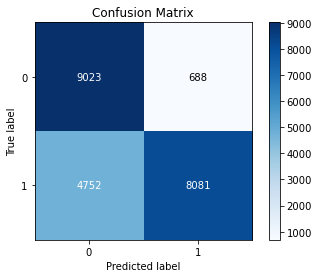

Accuracy: 0.75869 
Precision: 0.92154 
Recall: 0.62970 
F-measure: 0.74817 


In [163]:
y_prediction = NN(X_df_rfe, y_df, 13).predict(X_df_test_rfe) > 0.5
plotConfusionMatrix(y_prediction, y_df_test, 1)

Epoch 1/40
1260/1260 [==============================] - 5s 3ms/step - loss: 0.0910 - accuracy: 0.0068 - precision_47: 0.9798
Epoch 2/40
1260/1260 [==============================] - 4s 3ms/step - loss: 0.0627 - accuracy: 0.0327 - precision_47: 0.9823
Epoch 3/40
1260/1260 [==============================] - 4s 3ms/step - loss: 0.0570 - accuracy: 0.0822 - precision_47: 0.9823
Epoch 4/40
1260/1260 [==============================] - 4s 3ms/step - loss: 0.0532 - accuracy: 0.1945 - precision_47: 0.9830
Epoch 5/40
1260/1260 [==============================] - 4s 3ms/step - loss: 0.0484 - accuracy: 0.2462 - precision_47: 0.9844
Epoch 6/40
1260/1260 [==============================] - 4s 4ms/step - loss: 0.0439 - accuracy: 0.2828 - precision_47: 0.9859
Epoch 7/40
1260/1260 [==============================] - 4s 3ms/step - loss: 0.0397 - accuracy: 0.2916 - precision_47: 0.9871
Epoch 8/40
1260/1260 [==============================] - 4s 3ms/step - loss: 0.0370 - accuracy: 0.2984 - precision_47: 0.9875


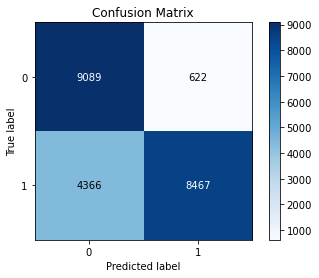

Accuracy: 0.77874 
Precision: 0.93157 
Recall: 0.65978 
F-measure: 0.77247 


In [164]:
y_prediction = NN(X_df_rfe_ss, y_df, 13).predict(X_df_test_rfe_ss) > 0.5
plotConfusionMatrix(y_prediction, y_df_test, 1)

In [165]:
labelsDF=reducedDf['label']
labelsDFtest = reducedDf_test['label']

scaler = preprocessing.StandardScaler().fit(reducedDf.loc[:, reducedDf.columns != 'label'])
unifiedDF=scaler.transform(reducedDf.loc[:, reducedDf.columns != 'label'])
scaler = preprocessing.StandardScaler().fit(reducedDf.loc[:, reducedDf.columns != 'label'])
unifiedDF_test=scaler.transform(reducedDf_test.loc[:, reducedDf_test.columns != 'label'])